
# EECS 4080: Computer Science Project
---


In this notebook, we will explore the fundamentals of network analysis, focusing on the application of machine learning techniques in Wi-Fi network traffic analysis and anomaly detection.





### **Required Imports**

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


### **Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
dataset_dir = '/content/drive/MyDrive/Colab Notebooks/ML Network Analysis Project/Datasets/'

Mounted at /content/drive/


The dataset consists of separate files for training and testing, provided by the dataset creator.

These files are in CSV format, with columns separated by commas (`","`).


**File Naming Convention:**

Each file corresponds to a specific outcome or category, which is reflected in the file's name.

*Eg:*  
The file `Benign_test.csv` indicates that it contains test data for a "Benign" network, meaning this file represents a normal network scenario.

#### Assigning the test and train dataset

In [ ]:
test = [ k for k in os.listdir(dataset_dir + "test") if k.endswith('.csv')]
print("\nTest Files: ", *test, sep="\n")
train = [ k for k in os.listdir(dataset_dir + "train") if k.endswith('.csv')]
print("\nTrain Files:", *train, sep="\n")

### **Dataframe Creation**

Creating a DataFrame to store Wi-Fi network traffic data.
* It allows for efficient data manipulation and analysis, enabling operations like filtering, aggregation, and merging.

**Note:** For display we would only show the Benign_test and Benign_train data


####*Test Dataframes*


In [ ]:
test_dataframes = {}
for file in test:
  df = pd.read_csv(dataset_dir + "test/" + file)
  test_dataframes[file] = df

test_dataframes['Benign_test.csv']

Header_Length  Protocol Type  Duration          Rate         Srate  \
0         138.200000            7.1      83.1  39123.054540  39123.054540   
1          86.000000            4.2      44.8  72928.095973  72928.095973   
2         171.400000            4.1      32.0  52552.111857  52552.111857   
3         227.800000            6.0      64.0  24502.562704  24502.562704   
4         347.600000            7.1      64.0   6263.156480   6263.156480   
...              ...            ...       ...           ...           ...   
37602  492183.800000            6.0      64.0      1.460795      1.460795   
37603  376918.500000            8.2      89.5      1.037002      1.037002   
37604  535203.100000            6.0      64.0      1.594049      1.594049   
37605  643476.300000            7.1      57.7      1.833959      1.833959   
37606  653141.777778            6.0      64.0      2.033819      2.033819   

       Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0        0.0              0.0              0.0              0.0   
1        0.0              0.0              0.0              0.0   
2        0.0              0.0              0.0              0.0   
3        0.0              0.0              0.0              0.0   
4        0.0              0.0              0.0              0.0   
...      ...              ...              ...              ...   
37602    0.0              0.0              0.0              0.0   
37603    0.0              0.0              0.0              0.0   
37604    0.0              0.0              0.0              0.0   
37605    0.0              0.0              0.0              0.0   
37606    0.0              0.0              0.0              0.0   

       psh_flag_number  ...         AVG         Std    Tot size           IAT  \
0             0.500000  ...  130.133651   58.513912   99.000000  1.694703e+08   
1             0.300000  ...   89.688165   44.556792   64.400000  1.694703e+08   
2             0.200000  ...  113.092857  148.485766  152.100000  9.108920e-02   
3             0.500000  ...  127.680349  214.732903   80.200000  1.694703e+08   
4             0.500000  ...  119.869921  116.233361  162.500000  9.976871e-02   
...                ...  ...         ...         ...         ...           ...   
37602         0.500000  ...   78.961508   15.701415   78.900000  1.482010e-04   
37603         0.400000  ...   94.675774   54.414418  121.700000  1.694699e+08   
37604         0.500000  ...   78.888611   15.410108   78.200000  6.599426e-05   
37605         0.400000  ...  113.666188  138.243753  141.900000  1.694699e+08   
37606         0.555556  ...   77.143739    8.135433   76.222222  1.111408e-01   

       Number   Magnitue      Radius    Covariance  Variance      Weight  
0         5.5  15.954786   82.751168   3899.571692  0.900000   38.500000  
1        13.5  13.405243   63.022662   1993.712535  1.000000  244.600000  
2         5.5  14.407632  209.990584  42487.982728  0.900000   38.500000  
3        13.5  15.986909  304.317403  46658.604609  1.000000  244.600000  
4         5.5  15.169114  164.378795  30786.754577  0.900000   38.500000  
...       ...        ...         ...           ...       ...         ...  
37602     5.5  12.559556   22.205155    280.231305  0.900000   38.500000  
37603    13.5  13.738859   77.194120   3688.197215  1.000000  244.600000  
37604     5.5  12.553867   21.793183    270.020962  0.900000   38.500000  
37605    13.5  15.063087  195.950460  21039.656146  1.000000  244.600000  
37606     5.0  12.419067   11.505240     74.497077  0.888889   31.666667  

[37607 rows x 45 columns]

#####*Shape of Each DataFrame:*

In [ ]:
[(test_key, test_value.shape) for test_key, test_value in test_dataframes.items()]

##### *Total no. of test data instances:*

In [ ]:
count = [x.shape[0] for x in test_dataframes.values()]
print(f"{sum(count):,}")

#### *Train Dataframes*

In [ ]:
train_dataframes = {}
for file in train:
  df = pd.read_csv(dataset_dir +"train/"+ file)
  train_dataframes[file] = df

train_dataframes['Benign_train.csv']

Header_Length  Protocol Type  Duration          Rate         Srate  \
0               134.3            7.1      64.0  40415.288318  40415.288318   
1               137.0            4.7      49.9  58749.191833  58749.191833   
2               283.9            6.0      64.0      3.497439      3.497439   
3               297.3            6.0      64.0   7297.703020   7297.703020   
4               572.3            7.1      57.7      2.549120      2.549120   
...               ...            ...       ...           ...           ...   
192727      1850189.0            6.0      64.0    109.936181    109.936181   
192728      1865129.0            6.0      64.0    110.402958    110.402958   
192729      1880069.0            6.0      64.0    110.866519    110.866519   
192730      1895009.0            6.0      64.0    111.378485    111.378485   
192731      1906961.0            6.0      64.0    111.790441    111.790441   

        Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0         0.0              0.0              0.0              0.0   
1         0.0              0.0              0.0              0.0   
2         0.0              0.0              0.0              0.0   
3         0.0              0.0              0.0              0.0   
4         0.0              0.0              0.0              0.0   
...       ...              ...              ...              ...   
192727    0.0              0.0              0.0              0.0   
192728    0.0              0.0              0.0              0.0   
192729    0.0              0.0              0.0              0.0   
192730    0.0              0.0              0.0              0.0   
192731    0.0              0.0              0.0              0.0   

        psh_flag_number  ...          AVG        Std  Tot size           IAT  \
0                   0.5  ...   119.317540  48.225852      95.3  1.694641e+08   
1                   0.2  ...    90.890653  59.753361     125.6  1.694641e+08   
2                   0.5  ...    74.826389  10.223690      80.6  8.070469e-05   
3                   0.5  ...    78.954816  15.625023      78.5  1.694641e+08   
4                   0.4  ...    99.332421  69.738867     139.0  9.993820e-02   
...                 ...  ...          ...        ...       ...           ...   
192727              0.0  ...  1494.000000   0.000000    1494.0  0.000000e+00   
192728              0.0  ...  1494.000000   0.000000    1494.0  1.694628e+08   
192729              0.0  ...  1494.000000   0.000000    1494.0  0.000000e+00   
192730              0.0  ...  1494.000000   0.000000    1494.0  1.694628e+08   
192731              0.0  ...  1494.000000   0.000000    1494.0  2.348423e-04   

        Number   Magnitue     Radius    Covariance  Variance      Weight  
0          5.5  15.312231  68.201654   2644.242675       0.9   38.500000  
1         13.5  13.468364  84.997147   5328.483794       1.0  244.600000  
2          5.5  12.229315  14.458481    124.725884       0.9   38.500000  
3         13.5  12.552920  21.904691    240.536207       1.0  244.600000  
4          5.5  13.928729  98.625651  11737.768847       0.9   38.500000  
...        ...        ...        ...           ...       ...         ...  
192727     5.5  54.662601   0.000000      0.000000       0.0   38.500000  
192728    13.5  54.662601   0.000000      0.000000       0.0  244.600000  
192729     5.5  54.662601   0.000000      0.000000       0.0   38.500000  
192730    13.5  54.662601   0.000000      0.000000       0.0  244.600000  
192731     3.5  54.662601   0.000000      0.000000       0.0   15.166667  

[192732 rows x 45 columns]

#### Shape of Each DataFrame:

In [ ]:
[(key, value.shape) for key, value in train_dataframes.items()]

##### Total count

In [ ]:
count = [x.shape[0] for x in train_dataframes.values()]
print(f"{sum(count):,}")

#### Final Dataframe Output

In [ ]:
train_dataframes['Benign_train.csv'].head()

In [ ]:
test_dataframes['Benign_test.csv'].head()

####Columns in a Dataframe

Both Test and Train data set have equal no. of columns (As expected).

We will look at what each column represent in this project context

In [ ]:
train_dataframes['Benign_train.csv'].columns

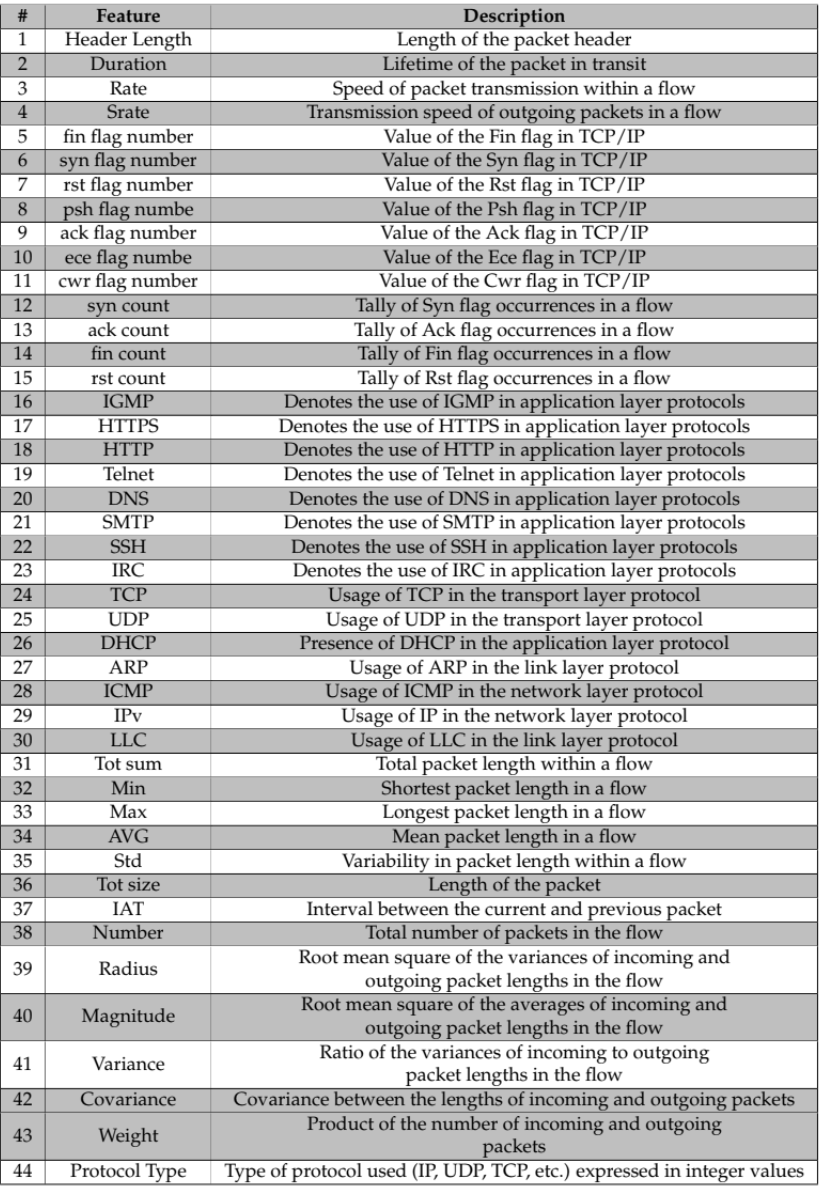

**Note**: Here Tot size, Number, Radius, Variance, Covariance, Weight have a different meaning and is according to the context of the network packets.

#### Each Row represents

**10 packets aveaged per row** (i.e., ping sweep, vulnerability scan, OS scan, MQTT malformed data, ARP spoofing, port scan, and benign)

**100 packets averaged per row** (e.g., MQTT DoS connect flood,
MQTT DDoS connect flood, MQTT DoS publish flood, MQTT DDoS publish flood, DoS TCP, DoS
ICMP, DoS SYN, DoS UDP, DDoS SYN, DDoS TCP, DDoS ICMP, DDoS UDP) packets

In [ ]:
train_dataframes['Benign_train.csv'].head(n=1)

In [ ]:
train_dataframes['TCP_IP-DDoS-SYN1_train.csv'].head(n=1)

### **DataFrame Preparation**




Perform necessary data cleaning to prepare the dataset for analysis.

1.  Combining csv files with same label for datasets.
2.  Adding an extra column *'**label**'*, which is the
    result value.  
3. Remove column ***Drate***.



#### *Combining same label dataframes*

In [ ]:
test_dataframes.keys()

In [ ]:
# DataFrame to delete after merging
df_delete = ['TCP_IP-DDoS-ICMP1_test.csv', 'TCP_IP-DDoS-ICMP2_test.csv', 'TCP_IP-DDoS-UDP2_test.csv', 'TCP_IP-DDoS-UDP1_test.csv']

# Merge dataframes
test_dataframes["TCP_IP-DDoS-ICMP_test.csv"] = pd.concat([test_dataframes['TCP_IP-DDoS-ICMP1_test.csv'],\
                                                          test_dataframes['TCP_IP-DDoS-ICMP2_test.csv']], ignore_index=True)

test_dataframes["TCP_IP-DDoS-UDP_test.csv"] = pd.concat([test_dataframes['TCP_IP-DDoS-UDP1_test.csv'],\
                                                          test_dataframes['TCP_IP-DDoS-UDP2_test.csv']], ignore_index=True)

# Delete the dataframes which are concatenated
for dfs in df_delete:
  del test_dataframes[dfs]

In [ ]:
test_dataframes.keys()

*Total no. of dataframes for training files:*

In [ ]:
len(train_dataframes.keys())

*We will be merging certain datasets which are basically representing the same type of attack.*

For Eg:
DoS TCP attack was divided into 4 csv files we will combine these to one

`train_dos_tcp = ['TCP_IP-DoS-TCP1_train.csv', 'TCP_IP-DoS-TCP2_train.csv', 'TCP_IP-DoS-TCP3_train.csv', 'TCP_IP-DoS-TCP4_train.csv']`

In [ ]:
# DataFrame to delete after merging
train_ddos_icmp = ['TCP_IP-DDoS-ICMP1_train.csv', 'TCP_IP-DDoS-ICMP2_train.csv', 'TCP_IP-DDoS-ICMP5_train.csv', 'TCP_IP-DDoS-ICMP3_train.csv', 'TCP_IP-DDoS-ICMP4_train.csv', 'TCP_IP-DDoS-ICMP7_train.csv', 'TCP_IP-DDoS-ICMP6_train.csv', 'TCP_IP-DDoS-ICMP8_train.csv']
train_ddos_syn = ['TCP_IP-DDoS-SYN3_train.csv', 'TCP_IP-DDoS-SYN1_train.csv', 'TCP_IP-DDoS-SYN2_train.csv', 'TCP_IP-DDoS-SYN4_train.csv']
train_ddos_tcp = ['TCP_IP-DDoS-TCP1_train.csv', 'TCP_IP-DDoS-TCP3_train.csv', 'TCP_IP-DDoS-TCP2_train.csv', 'TCP_IP-DDoS-TCP4_train.csv']
train_ddos_udp = ['TCP_IP-DDoS-UDP3_train.csv', 'TCP_IP-DDoS-UDP4_train.csv', 'TCP_IP-DDoS-UDP5_train.csv', 'TCP_IP-DDoS-UDP2_train.csv', 'TCP_IP-DDoS-UDP6_train.csv', 'TCP_IP-DDoS-UDP7_train.csv', 'TCP_IP-DDoS-UDP8_train.csv', 'TCP_IP-DDoS-UDP1_train.csv']
train_dos_icmp = ['TCP_IP-DoS-ICMP1_train.csv', 'TCP_IP-DoS-ICMP2_train.csv', 'TCP_IP-DoS-ICMP4_train.csv', 'TCP_IP-DoS-ICMP3_train.csv']
train_dos_syn = ['TCP_IP-DoS-SYN1_train.csv', 'TCP_IP-DoS-SYN3_train.csv', 'TCP_IP-DoS-SYN2_train.csv', 'TCP_IP-DoS-SYN4_train.csv']
train_dos_tcp = ['TCP_IP-DoS-TCP1_train.csv', 'TCP_IP-DoS-TCP2_train.csv', 'TCP_IP-DoS-TCP3_train.csv', 'TCP_IP-DoS-TCP4_train.csv']
train_dos_udp = ['TCP_IP-DoS-UDP1_train.csv', 'TCP_IP-DoS-UDP2_train.csv', 'TCP_IP-DoS-UDP3_train.csv', 'TCP_IP-DoS-UDP4_train.csv']

# Combine DataFrame list
df_to_combine = [train_ddos_icmp, train_ddos_syn, train_ddos_tcp, train_ddos_udp, train_dos_icmp, train_dos_syn, train_dos_tcp, train_dos_udp]

# Merge dataframes
train_dataframes["TCP_IP-DDoS-ICMP_train.csv"] = pd.concat([train_dataframes[x] for x in train_ddos_icmp] , ignore_index=True)
train_dataframes["TCP_IP-DDoS-SYN_train.csv"] = pd.concat([train_dataframes[x] for x in train_ddos_syn] , ignore_index=True)
train_dataframes["TCP_IP-DDoS-TCP_train.csv"] = pd.concat([train_dataframes[x] for x in train_ddos_tcp] , ignore_index=True)
train_dataframes["TCP_IP-DDoS-UDP_train.csv"] = pd.concat([train_dataframes[x] for x in train_ddos_udp] , ignore_index=True)
train_dataframes["TCP_IP-DoS-ICMP_train.csv"] = pd.concat([train_dataframes[x] for x in train_dos_icmp] , ignore_index=True)
train_dataframes["TCP_IP-DoS-SYN_train.csv"] = pd.concat([train_dataframes[x] for x in train_dos_syn] , ignore_index=True)
train_dataframes["TCP_IP-DoS-TCP_train.csv"] = pd.concat([train_dataframes[x] for x in train_dos_tcp] , ignore_index=True)
train_dataframes["TCP_IP-DoS-UDP_train.csv"] = pd.concat([train_dataframes[x] for x in train_dos_udp] , ignore_index=True)

# Delete the old DataFrames
for dfs in df_to_combine:
  for y in dfs:
    del train_dataframes[y]

In [ ]:
# Print updated dataframe file names
train_dataframes.keys()

*After deletion of redundant dataframes we get 19 dataframe for the training datasets.*

In [ ]:
len(train_dataframes)

#### *Adding result column*

We need to add a new label which would be our  '*y* ' value.

Here we would use the file name to automatically get the value for y.  

In [ ]:
# Since for test csv file names we have "_test.csv" redundant we would remove it
for key, value in test_dataframes.items():
  value['label'] = key[:-9]

# Similarly, for train csv file names we have "_train.csv" redundant we would remove it
for key, value in train_dataframes.items():
  value['label'] = key[:-10]


Here is the example of the value of the new column lablel (our *'y'* column)

In [ ]:
test_dataframes['Benign_test.csv']['label'].value_counts()

In [ ]:
train_dataframes['Benign_train.csv']['label'].value_counts()

#### *Removing Drate' column*

In [ ]:
for test_df in test_dataframes.values():
  test_df.drop(columns = ['Drate'], inplace = True)

for train_df in train_dataframes.values():
  train_df.drop(columns = ['Drate'], inplace = True)


In [ ]:
test_dataframes['Benign_test.csv'].columns

In [ ]:
train_dataframes['Benign_train.csv'].columns

#### Final Output After Cleaning

*Here we show output file for icmp to show all of the data cleaning in one.*

In [ ]:
train_dataframes['TCP_IP-DDoS-UDP_train.csv'].head()

In [ ]:
test_dataframes['TCP_IP-DDoS-UDP_test.csv'].head()

### **Exploratory Data Analysis**

#### Data Overview

We would only follow *Benign_test* and *Benign_train* for *describe()* and *info()* for simplicity

######Test DataFrame:

In [ ]:
test_dataframes['Benign_test.csv'].info()

For Benign test dataframe we have 37_607 instances and 45 columns out of which only the label column is `str` rest are of type `float`

In [ ]:
test_dataframes['Benign_test.csv'].describe()

###### Train Dataset

In [ ]:
train_dataframes['Benign_train.csv'].info()

For Benign train dataframe we have 192_732 instances and 45 columns out of which only the label column is str rest are of type float

In [ ]:
train_dataframes['Benign_train.csv'].describe()

#### Plots

##### Preparation for plots

In [ ]:
list_train_dataset = list(train_dataframes.keys())
list_train_dataset

*We are storing the no. of instances for every dataframe in their respective variables to display in the plots.*

In [ ]:
# Adding the no. of occurances as a variable for each csv
Benign = len(train_dataframes['Benign_train.csv'])
Spoofing = len(train_dataframes['ARP_Spoofing_train.csv'])
Ping = len(train_dataframes['Recon-Ping_Sweep_train.csv'])
VulScan = len(train_dataframes['Recon-VulScan_train.csv'])
OS = len(train_dataframes['Recon-OS_Scan_train.csv'])
Port = len(train_dataframes['Recon-Port_Scan_train.csv'])
Malformed = len(train_dataframes['MQTT-Malformed_Data_train.csv'])
DoS_Connect = len(train_dataframes['MQTT-DoS-Connect_Flood_train.csv'])
DoS_Publish = len(train_dataframes['MQTT-DoS-Publish_Flood_train.csv'])
DDoS_Connect = len(train_dataframes['MQTT-DDoS-Connect_Flood_train.csv'])
DDoS_Publish = len(train_dataframes['MQTT-DDoS-Publish_Flood_train.csv'])
DoS_TCP = len(train_dataframes['TCP_IP-DoS-TCP_train.csv'])
DoS_ICMP = len(train_dataframes['TCP_IP-DoS-ICMP_train.csv'])
DoS_SYN = len(train_dataframes['TCP_IP-DoS-SYN_train.csv'])
DoS_UDP = len(train_dataframes['TCP_IP-DoS-UDP_train.csv'])
DDoS_SYN = len(train_dataframes['TCP_IP-DDoS-SYN_train.csv'])
DDoS_TCP = len(train_dataframes['TCP_IP-DDoS-TCP_train.csv'])
DDoS_ICMP = len(train_dataframes['TCP_IP-DDoS-ICMP_train.csv'])
DDoS_UDP = len(train_dataframes['TCP_IP-DDoS-UDP_train.csv'])

In [ ]:
test_dataframes.keys()

##### MultiClass Classification

In [ ]:
# @title
class_counts = { key[:-10:]: len(values) for key, values in train_dataframes.items()}

# Plotting
plt.figure(figsize=(12, 6))  # Adjust figure size
plt.bar(class_counts.keys(), class_counts.values())
plt.yscale('log')  # Adjust the y values to be logarithmic to support better representation
plt.xlabel('Categories')
plt.ylabel('Number of Observations')
plt.title('Class Distribution in Categorical Classification')
plt.xticks(rotation=90)
plt.show()

Temporary Placeholder
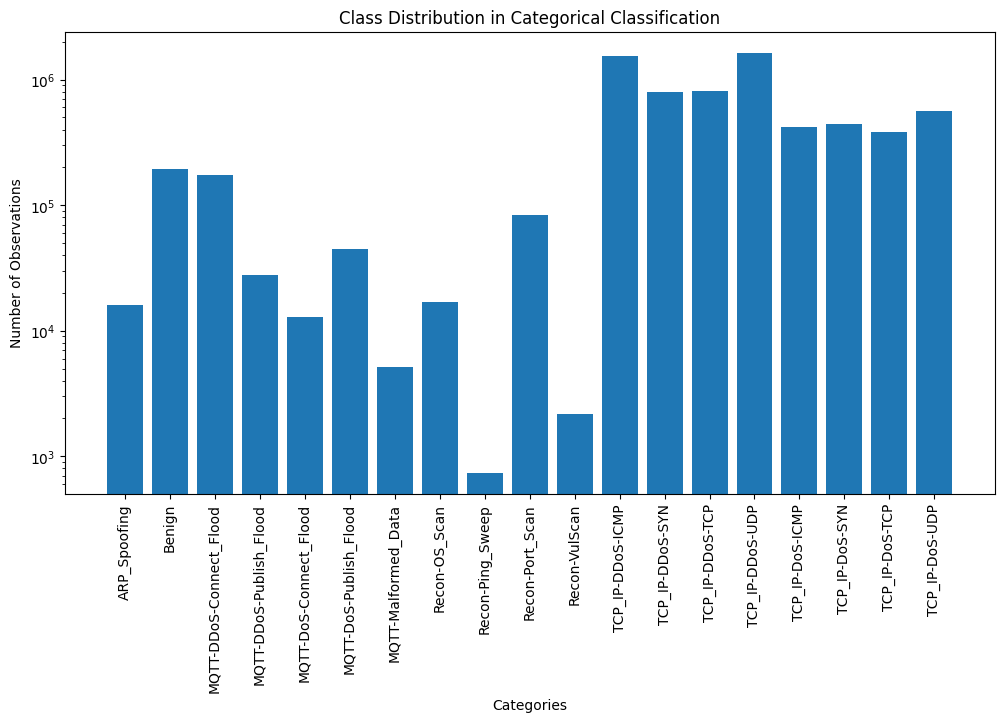

**Observation**:
The dataset contains a diverse mix of attack and benign traffic categories, with a noticeable imbalance favoring specific attack types (e.g., TCP-based DDoS, MQTT floods) and benign traffic. This imbalance highlights the need for strategies like oversampling, undersampling, or weighted loss functions to improve classification performance for underrepresented classes like ARP Spoofing and Reconnaissance.

##### Categorical Classification:
*Spoofing, Recon, Benign, MQTT*

In [ ]:
# Calculate the total no. of observations by category
spoofing_dfs = Spoofing
mqtt_dfs = DDoS_Connect + DDoS_Publish + DoS_Publish + DoS_Connect + Malformed
benign_dfs = Benign
recon_dfs = OS + Ping + Port + VulScan

# Create a dictionary with categories and their respective DataFrames length
category_counts = {
    'Spoofing': spoofing_dfs,
    'Recon': recon_dfs,
    'Benign': benign_dfs,
    'MQTT': mqtt_dfs
}

# Plotting
plt.bar(category_counts.keys(), category_counts.values())
plt.xlabel('Categories')
plt.ylabel('Number of Observations')
plt.title('Class Distribution in Categorical Classification')
plt.xticks(rotation=45)
plt.show()

Temporary Placeholder
![image.png](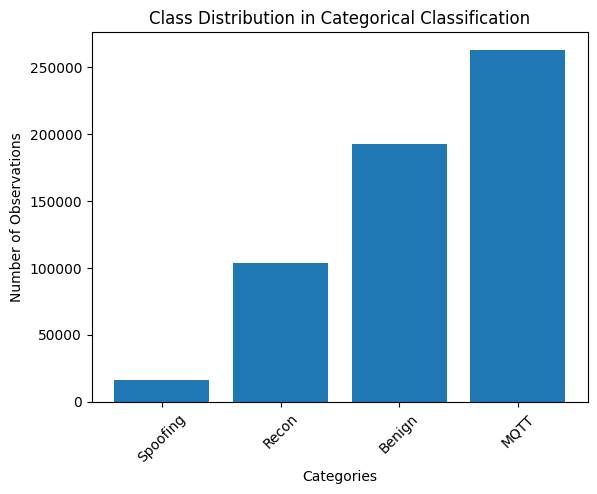
)

**Observation:** As we could see the graph shows that the Spoofing is the least represented among all of the classes with Benign and MQTT in reasonable amount comparetively

##### DoS vs DDoS Class Distribution

In [ ]:
DoS = DoS_UDP + DoS_TCP + DoS_SYN + DoS_ICMP + DoS_Connect + DoS_Publish
DDoS = DDoS_UDP + DDoS_TCP + DDoS_SYN + DDoS_ICMP + DDoS_Connect + DDoS_Publish

# Plotting
plt.figure(figsize=(12, 6))  # Adjust figure size
plt.bar(["DoS", "DDoS"], [DoS, DDoS])
plt.xlabel('Categories')
plt.ylabel('Number of Observations')
plt.title('Class Distribution in Categorical Classification')
plt.xticks(rotation=90)
plt.show()

Temporary Placeholder
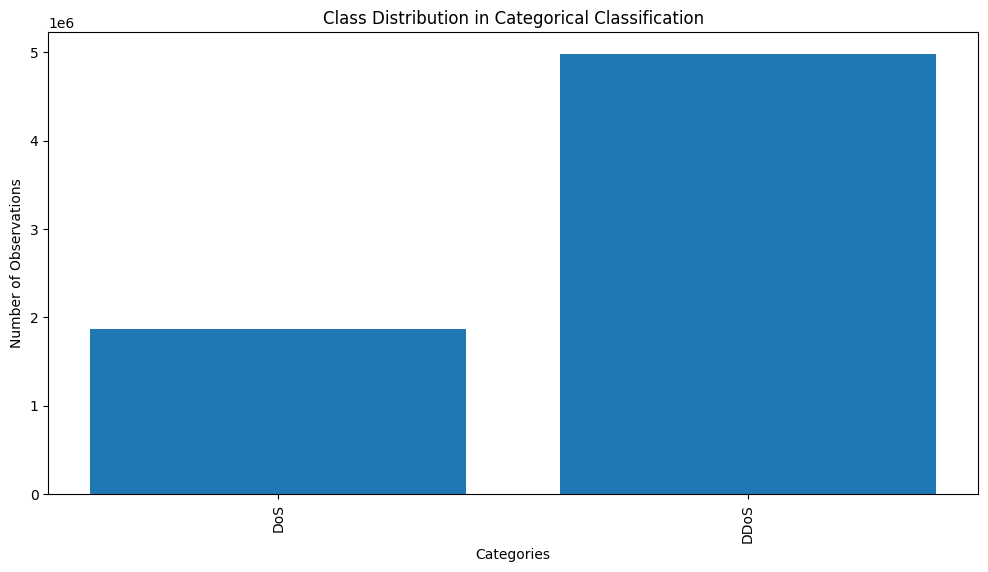


**Observation:** The graph on y-axis is scaled in millions. We have way more DDoS attacks then DoS.

DDoS (Distributed Denial of Service)

DoS (Denial of Service)

##### MultiClass Classification For DoS & DDoS

In [ ]:
class_counts = {
      "DoS-TCP": DoS_TCP,
     "DoS-ICMP": DoS_ICMP,
      "DoS-SYN": DoS_SYN,
      "DoS-UDP": DoS_UDP,
     "DDoS-TCP": DDoS_TCP,
    "DDoS-ICMP": DDoS_ICMP,
     "DDoS-SYN": DDoS_SYN,
     "DDoS-UDP": DDoS_UDP
  }

# Plotting
plt.figure(figsize=(12, 6))  # Adjust figure size
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Categories')
plt.ylabel('Number of Observations')
plt.title('Class Distribution in Categorical Classification')
plt.xticks(rotation=90)
plt.show()

Temporary Placeholder
![image.png](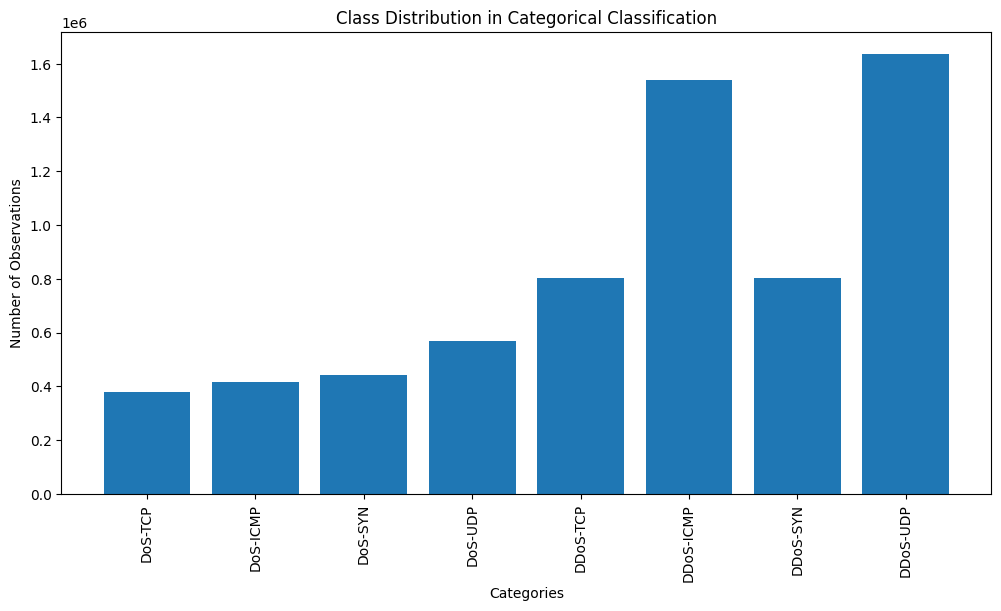
)

**Observation:**
1. DDoS attacks consistently show higher frequency than their DoS counterparts across all protocols (TCP, ICMP, SYN, UDP), with UDP-based DDoS attacks being the most prevalent and TCP-based DoS attacks being the least common.

2. There's a clear hierarchy in attack frequencies: `UDP > ICMP > SYN > TCP`, which likely reflects the ease of execution and effectiveness of these attack types in real-world scenarios.



#### Data Cleaning

##### Correlation between features

In [ ]:
train_dataframes['Benign_train.csv'].columns

In [ ]:
# Combining all csv to one and removing the y column
combined_df = pd.concat(train_dataframes.values(), ignore_index=True)
updated_df = combined_df.drop(columns = ["label"])


In [ ]:
corr_matrix = updated_df.corr()

In [ ]:
# plt.figure(figsize=(25, 25))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

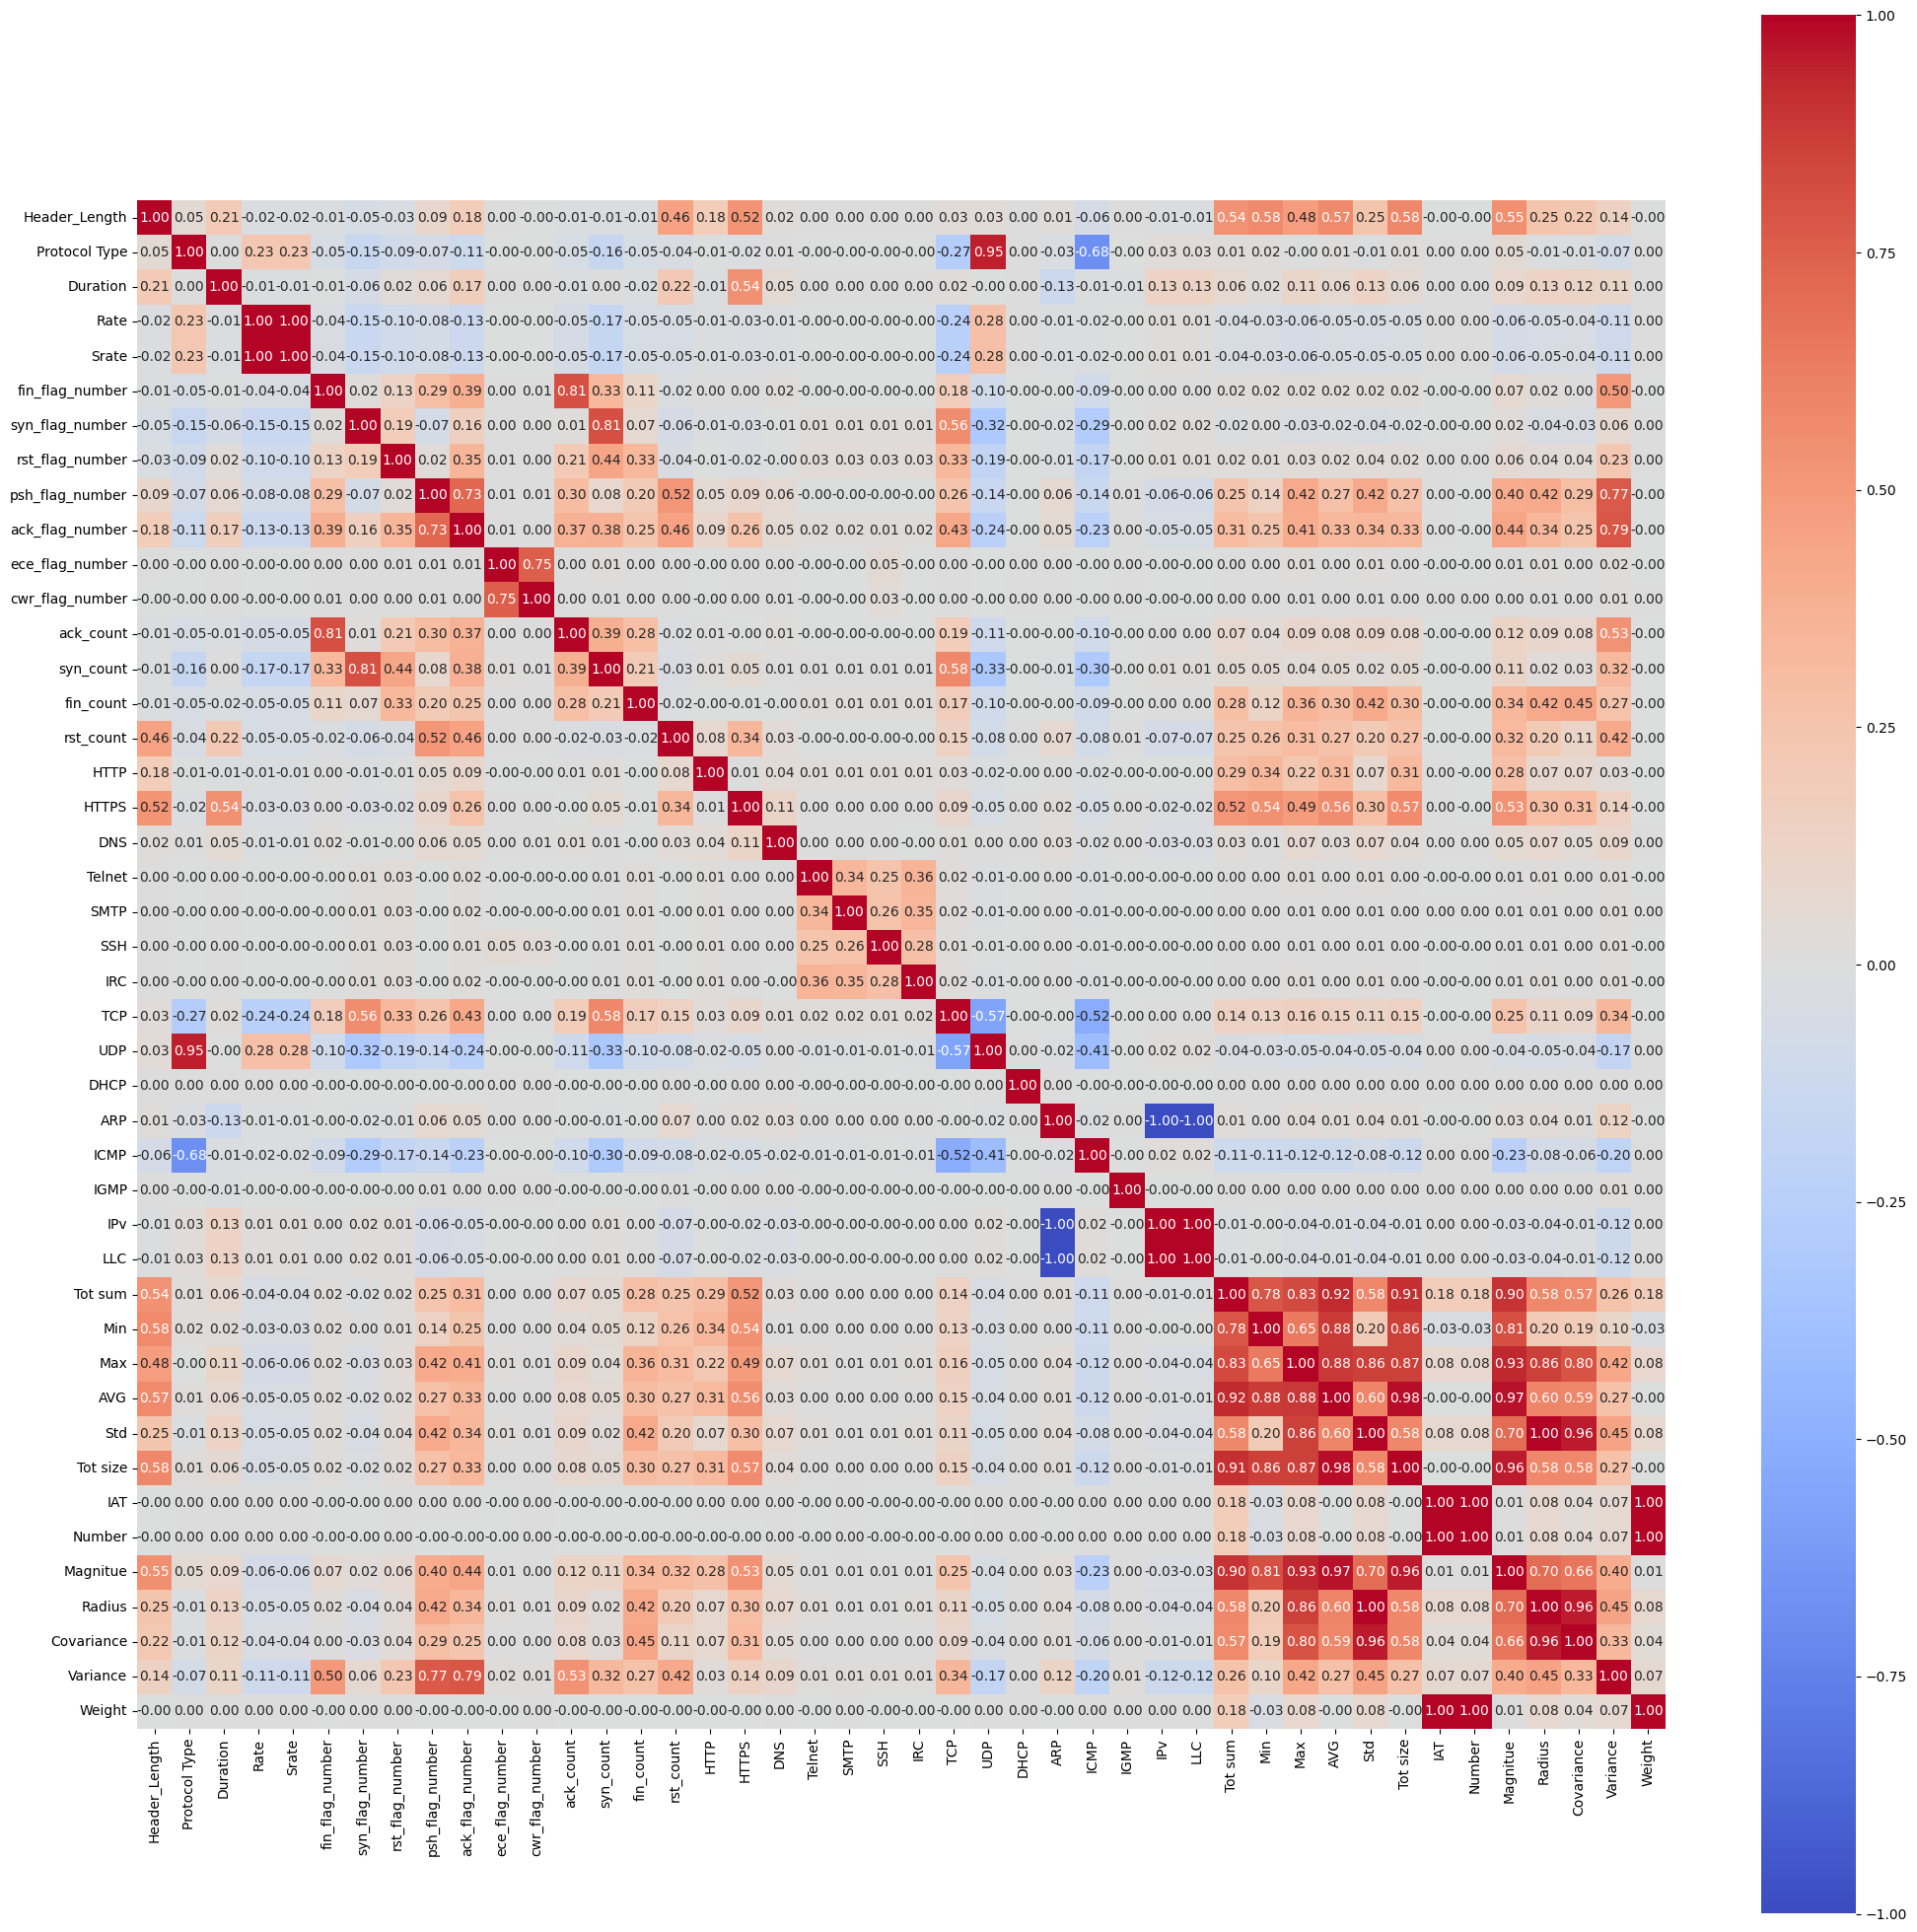

##### Correlation Observations:


In [ ]:
# Set a threshold for strong correlation
threshold = 0.6

# # Get absolute values of the correlation matrix
# abs_corr_matrix = corr_matrix.abs()

# Create a mask for correlations above the threshold, excluding 1.0
mask = ((corr_matrix > threshold) | (corr_matrix < -threshold)) & (corr_matrix < 1.0)

# Get the filtered correlation matrix
strong_corr = corr_matrix[mask]

# Optional: Display non-null values (i.e., correlations that are above the threshold)
strong_corr_values = strong_corr.stack().reset_index()
strong_corr_values.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Sort the pairs to ensure consistent order
strong_corr_values['pair'] = strong_corr_values.apply(lambda x: tuple(sorted([x['Feature 1'], x['Feature 2']])), axis=1)

# Drop duplicates based on the sorted pairs
strong_corr_values = strong_corr_values.drop_duplicates(subset='pair').drop(columns='pair')
strong_corr_values = strong_corr_values.sort_values(by = "Correlation", ascending = False)
strong_corr_values.reset_index(drop=True)

Learning from visualization

In [ ]:
fig = plt.figure(figsize=(20, 10))

a1 = fig.add_subplot(4, 2, 1)
a2 = fig.add_subplot(4, 2, 2)
a3 = fig.add_subplot(4, 2, 3)
a4 = fig.add_subplot(4, 2, 4)
a5 = fig.add_subplot(4, 2, 5)
a6 = fig.add_subplot(4, 2, 6)
a7 = fig.add_subplot(4, 2, 7)
a8 = fig.add_subplot(4, 2, 8)

a1.plot(combined_df['Rate'], combined_df['Srate'])
a1.set_xlabel('Rate')
a1.set_ylabel('Srate')

a2.plot(combined_df['ARP'], combined_df['LLC'])
a2.set_xlabel('ARP')
a2.set_ylabel('LLC')

a3.plot(combined_df['ARP'], combined_df['IPv'])
a3.set_xlabel('ARP')
a3.set_ylabel('IPv')

a4.scatter(combined_df['Std'], combined_df['Covariance'])
a4.set_xlabel('Std')
a4.set_ylabel('Covariance')

a5.plot(combined_df['Std'], combined_df['Radius'])
a5.set_xlabel('Std')
a5.set_ylabel('Radius')

a6.scatter(combined_df['Weight'], combined_df['Number'], c=combined_df['IAT'], cmap="cool", edgecolors='k')
a6.set_xlabel('Weight')
a6.set_ylabel('Number')

a7.scatter(combined_df['ece_flag_number'], combined_df['cwr_flag_number'])
a7.set_xlabel('Ece Flag')
a7.set_ylabel('CWR Flag')

a8.scatter(combined_df['AVG'], combined_df['Tot sum'], c=combined_df['Magnitue'])
a8 .set_xlabel('AVG')
a8.set_ylabel('Tot sum')

plt.tight_layout()
plt.show()

Temporary Placeholder
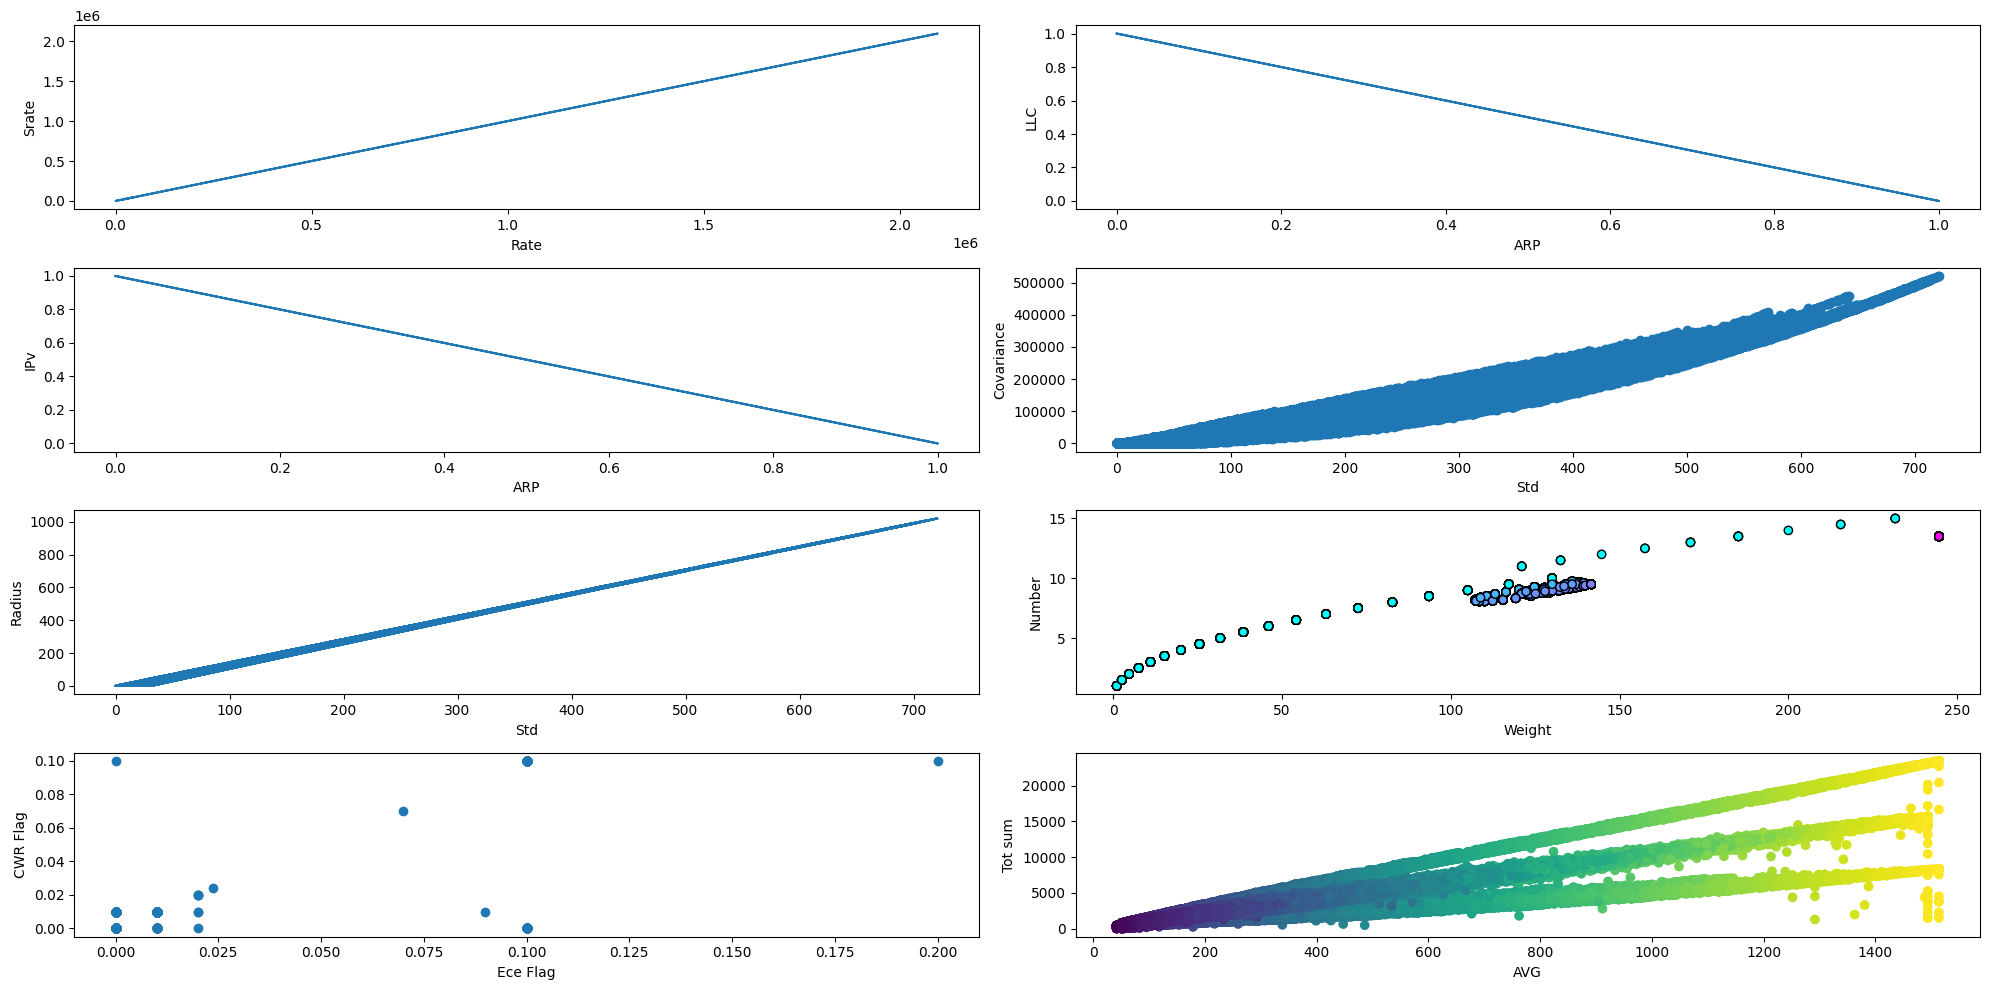

**Graph 1:** We can observe Srate and Rate have high correlation of 1 which means we could drop one of the 2

Srate: Transmission speed of outgoing packets in a flow.

Rate: Speed of packet transmission within a flow.

---


**Graph 2 and 3:**
ARP has -ve correlation with LLC and IPv, this is interesting because ARP is used for mapping IP addr to Mac addr no need for LLC or IP headers, in contrast, LLC is layer 2 communication hence ARP and LLC or ARP and IPv cannot exist in the same packet as ARP. Therefore they have perfect -1 correlation. So, we can drop the two LLC and IPv since we can derive their value from ARP (It would be negate of value of ARP)


---


**Graph 4 and 5:** Std is positively in correlation with Radius and Covariance, therefore we could remove both of these and use Std to train our model on.

*Std*: Variability in packet length

*Radius*: Root mean square of the variance of incoming and outgoing packet length

*Covariance:* Covariance between the length of incoming and outgoing packet


---


**Graph 6:** ALl three variables *Weight*, *IAT* and *Number* are derived from the packets arriving and are in perfect +ve correlation. Therefore we can remove 2 of these varriables.

*Weight:* Product of no. of incoming and outgoing packets.

*IAT:* Interval between the current and prev packet.

*Number:* Total no. of packets in the flow.



---

**Graph 7:**
This graph is the most intersting one since ece and cwr flag are flags for congestions control in network. In the previous output we saw +0.75 correlation however from the graph we could see they might not be a good correlation overall.

 *Echo flag (ECE)* in TCP is used for notifying congestion in the network. It allows end-to-end congestion notification without dropping packets.

 *The Congestion Window Reduced (CWR)* flag in TCP is used as part of congestion control mechanisms. It indicates that the sender has reduced its transmission rate due to network congestion.

  ***For DDoS Detection-*** These flags are highly relevant as they reflect congestion behavior triggered by attack traffic. So we won't remove the flags.

---


**Group 8:** Similar to other graphs, Avg seems to be a good estimate of Magnitude, Tot sum, min, max as the correlation between them is +ve. So we could drop those features as well.


Therefore learning from our data analysis, it would be wise to remove the redundant features:

Srate, LLC, IPv, Radius, Covariance, Weight, number, Magnitude, Tot sum, min, max.

In [ ]:
# Features to drop including the y column ('label')
col_to_drop = ['Srate', 'LLC', 'IPv', 'Radius', 'Covariance', 'Weight', 'Number', 'Magnitue', 'Tot sum', 'Min', 'Max', 'label']

Creating dataset

##### Splitting Train dataset into validation dataset


*  Since, the training dataset



In [ ]:
# Combining all csv to one and removing the y column
Xtrain = combined_df.drop(columns = col_to_drop)
ytrain = combined_df['label']

combined_test_df = pd.concat(test_dataframes.values(), ignore_index=True)
X_test = combined_test_df.drop(columns = col_to_drop)
y_test = combined_test_df['label']

*We will do the "Stratified" split of the Train DataFrame into train and validation DataFrame.*

Stratified Split: It means splitting based on the ratio of the classes in the result column

In [ ]:

# Split Xtrain into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    Xtrain, ytrain,  # Features and target labels
    test_size=0.2,   # 20% of the data for validation
    stratify=ytrain, # Maintains the class distribution in both splits
    random_state=42
)


In [ ]:
# Check the resulting shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (5728664, 33) (5728664,)
Validation set shape: (1432167, 33) (1432167,)
Test set shape: (1614182, 33) (1614182,)


Storing the files to save the computing units

In [ ]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

###### Let's See the Distribution of classes in the Train, Val and Test sets.




In [ ]:
y_train.value_counts()

label
TCP_IP-DDoS-UDP            1308765
TCP_IP-DDoS-ICMP           1229981
TCP_IP-DDoS-TCP             643572
TCP_IP-DDoS-SYN             641569
TCP_IP-DoS-UDP              453560
TCP_IP-DoS-SYN              353522
TCP_IP-DoS-ICMP             333033
TCP_IP-DoS-TCP              304307
Benign                      154186
MQTT-DDoS-Connect_Flood     138429
Recon-Port_Scan              67185
MQTT-DoS-Publish_Flood       35501
MQTT-DDoS-Publish_Flood      22098
Recon-OS_Scan                13466
ARP_Spoofing                 12838
MQTT-DoS-Connect_Flood       10218
MQTT-Malformed_Data           4104
Recon-VulScan                 1738
Recon-Ping_Sweep               592
Name: count, dtype: int64

In [ ]:
y_val.value_counts()

label
TCP_IP-DDoS-UDP            327191
TCP_IP-DDoS-ICMP           307495
TCP_IP-DDoS-TCP            160893
TCP_IP-DDoS-SYN            160393
TCP_IP-DoS-UDP             113390
TCP_IP-DoS-SYN              88381
TCP_IP-DoS-ICMP             83259
TCP_IP-DoS-TCP              76077
Benign                      38546
MQTT-DDoS-Connect_Flood     34607
Recon-Port_Scan             16796
MQTT-DoS-Publish_Flood       8875
MQTT-DDoS-Publish_Flood      5525
Recon-OS_Scan                3366
ARP_Spoofing                 3209
MQTT-DoS-Connect_Flood       2555
MQTT-Malformed_Data          1026
Recon-VulScan                 435
Recon-Ping_Sweep              148
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

label
TCP_IP-DDoS-UDP            362070
TCP_IP-DDoS-ICMP           349699
TCP_IP-DDoS-TCP            182598
TCP_IP-DDoS-SYN            172397
TCP_IP-DoS-UDP             137553
TCP_IP-DoS-SYN              98595
TCP_IP-DoS-ICMP             98432
TCP_IP-DoS-TCP              82096
MQTT-DDoS-Connect_Flood     41916
Benign                      37607
Recon-Port_Scan             22622
MQTT-DoS-Publish_Flood       8505
MQTT-DDoS-Publish_Flood      8416
Recon-OS_Scan                3834
MQTT-DoS-Connect_Flood       3131
MQTT-Malformed_Data          1747
ARP_Spoofing                 1744
Recon-VulScan                1034
Recon-Ping_Sweep              186
Name: count, dtype: int64

## Training Model

### Training Specific Imports

In [ ]:
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight

# XGBoost specific
import xgboost as xgb
from xgboost import XGBClassifier
import cupy as cp

# TensorFlow Specific
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



In [ ]:
# Installing the required nvidia modules which run algorithms on the gpu accelerated platform

!pip install --extra-index-url=https://pypi.nvidia.com \
    "cudf-cu12==24.10.*" "dask-cudf-cu12==24.10.*" "cuml-cu12==24.10.*"

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.7/567.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 836.6/836.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.9/196.9 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.7/722.7 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.0/916.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Random Forest Classifier
import cuml
from cuml.ensemble import RandomForestClassifier
import cudf

# Logistic Regression
from cuml.linear_model import LogisticRegression

Loading the csv files that were stored.
We did this after restarting the runtime therefore, saving the RAM space.

In [ ]:
# TO save computing units we would load the data again after clearing out the ram from data cleaning and analysis part
path = "/content/drive/MyDrive/Colab Notebooks/ML Network Analysis Project/Datasets/Data/"
X_train = pd.read_csv(path + 'X_train.csv')
y_train = pd.read_csv(path + 'y_train.csv')
X_val = pd.read_csv(path + 'X_val.csv')
y_val = pd.read_csv(path + 'y_val.csv')
X_test = pd.read_csv(path + 'X_test.csv')
y_test = pd.read_csv(path + 'y_test.csv')

Now, we would be doing 3 different types of classification


1.   Binary Classification
2.   Categorical Classification
3.   MultiClass Classification



We will be using 4 different models to fit our dataset.

**Note:** Because of CPU computing unit limitations, we will be using GPU accelerated algorithms.



1.   Random-Forest using cuML
2.   XGBoost
3.   Logistic Regression using (TensorFlow/ cuML)   
4.   Deep Neural Network (TensorFlow)



### Analysis helper methods

In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names=[0,1], title="Confusion Matrix"):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Add balanced accuracy
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    print(f"\n{title} Balanced Accuracy: {balanced_acc:.4f}")

    # Create a heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()

In [ ]:

def evaluate_predictions(y_true, y_pred, y_true_original, label_encoder, dataset_name=""):
    """
    Evaluate predictions with classification report and confusion matrix
    """
    # Convert GPU arrays to CPU if needed
    if isinstance(y_true, cp.ndarray):
        y_true = cp.asnumpy(y_true)
    if isinstance(y_pred, cp.ndarray):
        y_pred = cp.asnumpy(y_pred)

    # Print classification report
    print(f"\n{dataset_name} Classification Report:")
    print(classification_report(y_true, y_pred,
                              target_names=label_encoder.classes_))
    # Add balanced accuracy
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    print(f"\n{dataset_name} Balanced Accuracy: {balanced_acc:.4f}")

    # Create confusion matrix plot
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'{dataset_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


## Binary Classification (Benign vs attack)



*First we will update the dataframe to reflect 1 (if Benign) and 0 (if attack)*

In [ ]:
y_train_binary = y_train['label'].apply(lambda x: 1 if x == 'Benign' else 0)
y_val_binary = y_val['label'].apply(lambda x: 1 if x == 'Benign' else 0)
y_test_binary = y_test['label'].apply(lambda x: 1 if x == 'Benign' else 0)

In [ ]:
y_train_binary.value_counts()

label
0    5574478
1     154186
Name: count, dtype: int64

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### GPU Accelearated Module Requirements

*We need to install cuML Module for GPU accelerated Random Forest*

### Random Forest
GPU Accelerated cuML based algorithm

Cudf modules require the dataframes to be converted to cudf.Dataframe which is gpu implementation of the pandas library.

In [ ]:
# Convert pandas DataFrame to cuDF
X_train_cudf = cudf.DataFrame.from_pandas(pd.DataFrame(X_train_scaled))
y_train_cudf = cudf.Series(y_train_binary)

X_val_cudf = cudf.DataFrame.from_pandas(pd.DataFrame(X_val_scaled))
y_val_cudf = cudf.Series(y_val_binary)

X_test_cudf = cudf.DataFrame.from_pandas(pd.DataFrame(X_test_scaled))
y_test_cudf = cudf.Series(y_test_binary)


#### Train

In [ ]:
rf_binary = RandomForestClassifier(
    n_estimators=100,         # Increase the number of trees for stability
    max_depth=15,             # Allow trees to grow deeper for complex patterns
    min_samples_split=5,      # Minimum samples required to split a node
    min_samples_leaf=2,       # Minimum samples per leaf
    max_features="log2",      # Use a subset of features for diversity
    bootstrap=True,           # Use bootstrap sampling
    random_state=42           # Ensures reproducibility
)

# Train the model
rf_binary.fit(X_train_cudf, y_train_cudf)


#### Validation

Since, we have imbalanced dataset there is a chance that our training data might overfit so we would compare the outcome on the validation dataset and then test dataset.


In [ ]:
# Predict on Validation Set
y_val_pred = rf_binary.predict(X_val_cudf)
y_val_pred.value_counts()


0    1393180
1      38987
Name: count, dtype: int64

In [ ]:
# Convert cuDF Series to NumPy arrays (since they're already in int64 format)
y_val_binary_num = y_val_binary.to_numpy()  # Convert the true labels to NumPy array
y_val_rf_binary_pred = y_val_pred.to_numpy()  # Convert the predicted labels to NumPy array

# Now, compute AUC-ROC using NumPy arrays
roc_auc = roc_auc_score(y_val_binary_num, y_val_rf_binary_pred)
print("Validation AUC-ROC (GPU):", roc_auc)

# For classification report, you can also use the NumPy arrays
print("Validation Classification Report:")
print(classification_report(y_val_binary_num, y_val_rf_binary_pred))


Validation AUC-ROC (GPU): 0.9921901913802987
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1393621
           1       0.97      0.99      0.98     38546

    accuracy                           1.00   1432167
   macro avg       0.99      0.99      0.99   1432167
weighted avg       1.00      1.00      1.00   1432167



#### Test

*Now tesing the model on the Test Dataset*

In [ ]:
y_test_rf_binary_pred = rf_binary.predict(X_test_cudf)

Test Area under the ROC curve: 0.9751708959246309
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1576575
           1       0.95      0.95      0.95     37607

    accuracy                           1.00   1614182
   macro avg       0.97      0.98      0.97   1614182
weighted avg       1.00      1.00      1.00   1614182


Test Set Balanced Accuracy: 0.9752


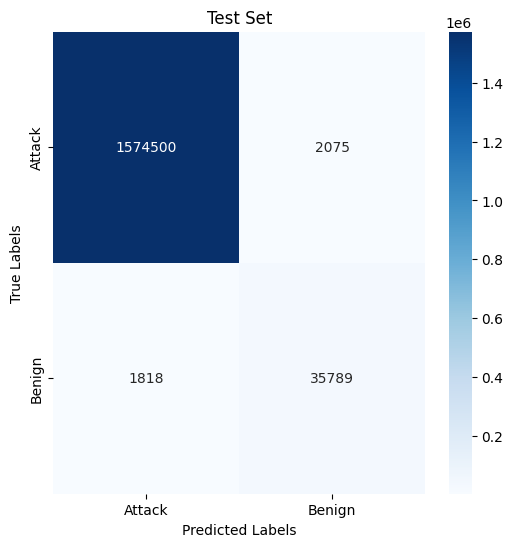

In [ ]:
y_test_binary_num = y_test_binary.to_numpy()
y_test_rf_binary_pred = y_test_rf_binary_pred.to_numpy()

roc_auc = roc_auc_score(y_test_binary_num, y_test_rf_binary_pred)

print("Test Area under the ROC curve:", roc_auc)
print("Classification Report:\n", classification_report(y_test_binary_num,  y_test_rf_binary_pred))
plot_confusion_matrix(y_test_binary_num,  y_test_rf_binary_pred, class_names=['Attack', 'Benign'], title="Test Set")

We have accuracy of 1 which is not possible this is because of how the accuracy is calculated in imbalanced datasets.

Dataset is highly imbalanced:


DDoS: 3,823,887 samples (66.7%)
DoS: 1,444,422 samples (25.2%)
MQTT: 210,350 samples (3.7%)
Benign: 154,186 samples (2.7%)
Recon: 82,981 samples (1.4%)
Spoofing: 12,838 samples (0.2%)


The accuracy metric is calculated as (total correct predictions)/(total samples).

Since largest classes (DDoS and DoS) have near-perfect prediction (1.00 precision and recall) and they make up about 92% of your dataset, the overall accuracy appears as 1.00 even though smaller classes like Spoofing perform poorly.

So we will consider balanced accuracy score/ AUC ROC which is more reflective on the model's performance.

### XGBoost (AdaBoost alt.)

For AdaBoost, again we will use XGBoost since that's GPU accelerated.

In AdaBoost we adjust the weights of miscllasified sample giving them importance in next iteration whereas in XGBoost we focus on optimizing the loss function using the gradient descent.

#### Train

In [ ]:
# Initialize xgb model
xgb_bin_model = XGBClassifier(
   objective='binary:logistic',
   eval_metric=['auc', 'logloss'],
   max_depth=4,
   learning_rate=0.01,
   n_estimators=300,
   subsample=0.8,
   colsample_bytree=0.8,
   min_child_weight=3,
   gamma=0.1,
   reg_alpha=0.1,
   reg_lambda=1,
   tree_method='gpu_hist',
   predictor='gpu_predictor',
   random_state=42
)

In [ ]:
# Calculate class weights
class_counts = np.bincount(cp.asnumpy(y_train_cudf))
total_samples = len(y_train_cudf)
class_weights = {i: total_samples / (len(class_counts) * count)
                for i, count in enumerate(class_counts)}


# Prepare sample weights for training
sample_weights = np.array([class_weights[y] for y in cp.asnumpy(y_train_cudf)])
sample_weights


array([ 0.51382964,  0.51382964,  0.51382964, ...,  0.51382964,
       18.57712114,  0.51382964])

In [ ]:
 # Train the model with early stopping
print("Training XGBoost model...")
xgb_bin_model.fit(
    X_train_cudf,
    y_train_cudf,
    sample_weight=sample_weights,
    eval_set=[(X_val_cudf, y_val_cudf)],  # Wrap in a list of tuples
    verbose=100
)

Training XGBoost model...
[0]	validation_0-auc:0.99762	validation_0-logloss:0.68352


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:16:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:16:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-auc:0.99943	validation_0-logloss:0.21737
[200]	validation_0-auc:0.99967	validation_0-logloss:0.08448
[299]	validation_0-auc:0.99978	validation_0-logloss:0.03713


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['auc', 'logloss'],
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, predictor='gpu_predictor', ...)

In [ ]:
# Make predictions (reuse prediction variables)
xgb_train_preds = xgb_bin_model.predict(X_train_cudf)

In [ ]:

label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(['Benign', 'Attack'])


Training Set Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00   5574478
      Attack       0.86      1.00      0.93    154186

    accuracy                           1.00   5728664
   macro avg       0.93      1.00      0.96   5728664
weighted avg       1.00      1.00      1.00   5728664


Training Set Balanced Accuracy: 0.9977


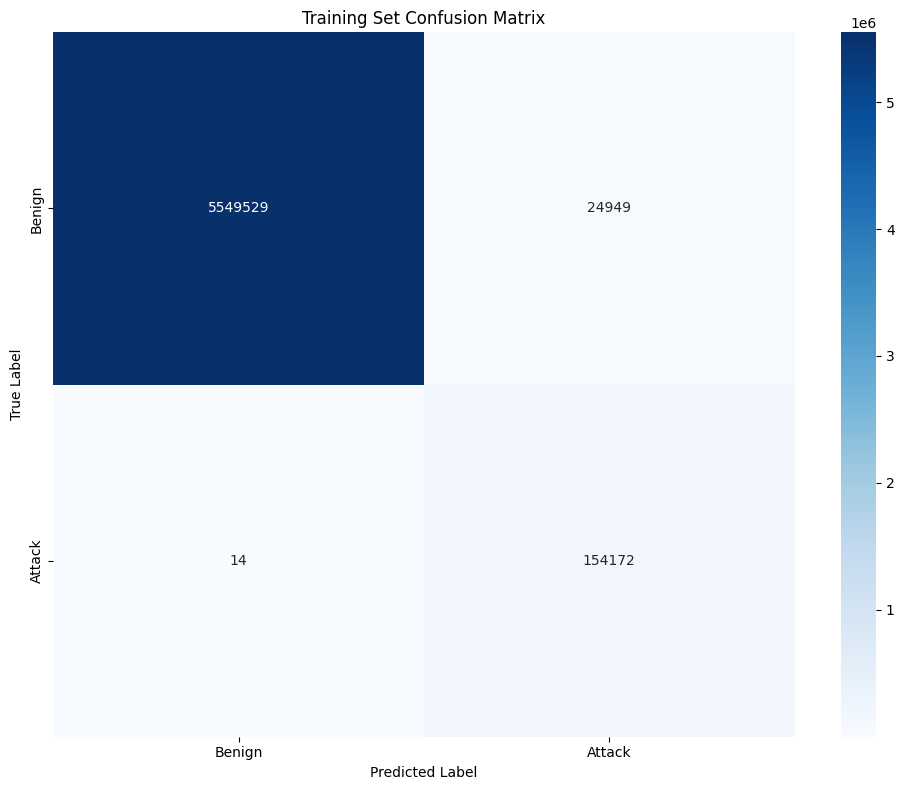

In [ ]:
evaluate_predictions(y_train_cudf.to_numpy(), xgb_train_preds, y_train_binary,
                    label_encoder, "Training Set")

#### Validation


In [ ]:
# Predictions
xgb_val_preds = xgb_bin_model.predict(X_val_cudf)


Validation Set Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00   1393621
      Attack       0.86      1.00      0.93     38546

    accuracy                           1.00   1432167
   macro avg       0.93      1.00      0.96   1432167
weighted avg       1.00      1.00      1.00   1432167


Validation Set Balanced Accuracy: 0.9977


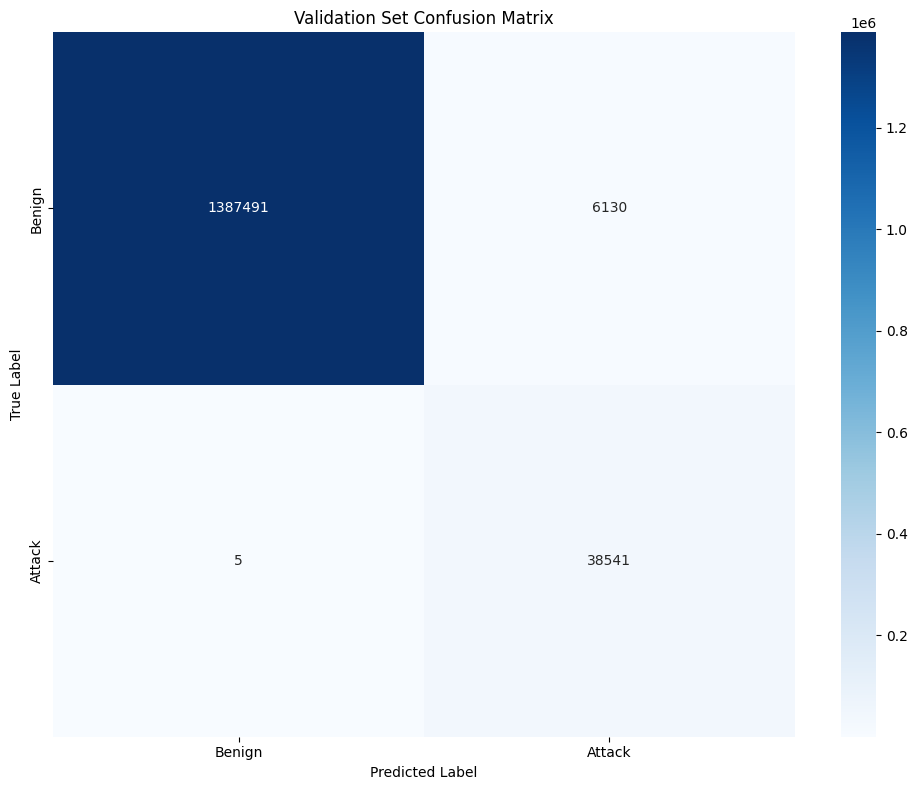

In [ ]:
# Evaluate
evaluate_predictions(y_val_cudf.to_numpy(), xgb_val_preds, y_val,
                     label_encoder, "Validation Set")

#### Test

In [ ]:
# Predictions
xgb_test_preds = xgb_bin_model.predict(X_test_cudf)


Test Set Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00   1576575
      Attack       0.86      1.00      0.93     37607

    accuracy                           1.00   1614182
   macro avg       0.93      1.00      0.96   1614182
weighted avg       1.00      1.00      1.00   1614182


Test Set Balanced Accuracy: 0.9981


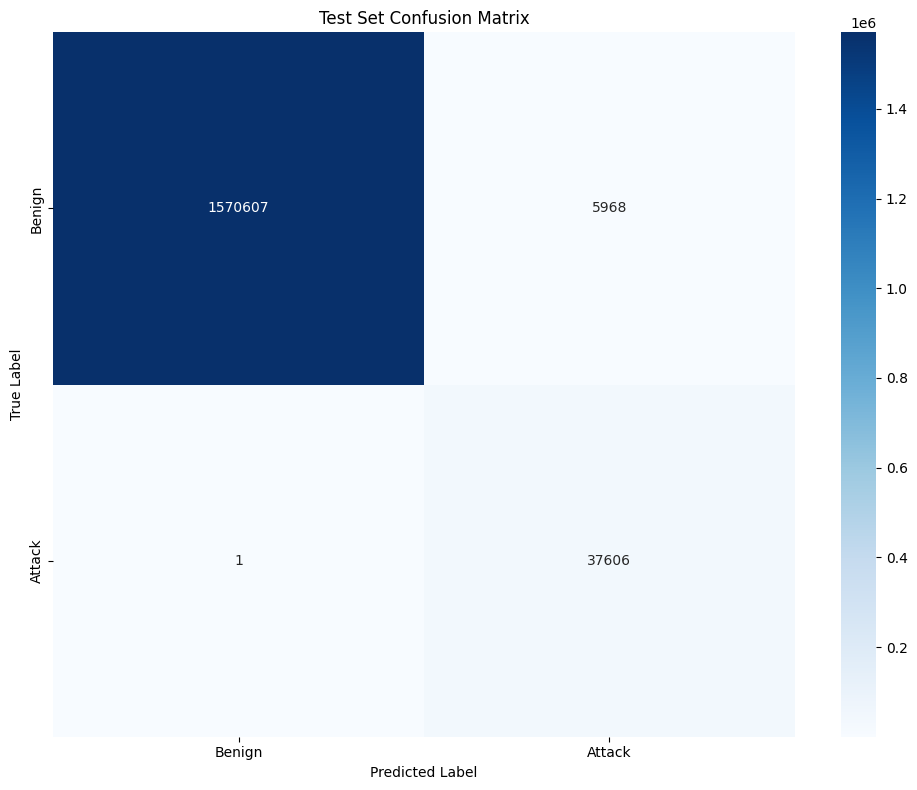

In [ ]:
evaluate_predictions(y_test_cudf.to_numpy(), xgb_test_preds, y_test_binary,
                    label_encoder, "Test Set")

### Logistic Regression

Here the activation funciton is sigmoid which is basically performing the algorithm of logistic regression since we only have this 1 layer for the data

#### Train

In [ ]:
model = Sequential([
    Dense(1, input_dim=X_train.shape[1], activation='sigmoid')  # Logistic regression
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#### Validation


In [ ]:
model.fit(
    X_train, y_train_binary,
    epochs=3, batch_size=64,
    validation_data=(X_val, y_val_binary)
)


Epoch 1/3
89511/89511 ━━━━━━━━━━━━━━━━━━━━ 202s 2ms/step - accuracy: 0.9616 - loss: 2108.7087 - val_accuracy: 0.9844 - val_loss: 4528.5903
Epoch 2/3
89511/89511 ━━━━━━━━━━━━━━━━━━━━ 202s 2ms/step - accuracy: 0.9686 - loss: 2083.6350 - val_accuracy: 0.9838 - val_loss: 5997.3003
Epoch 3/3
89511/89511 ━━━━━━━━━━━━━━━━━━━━ 170s 2ms/step - accuracy: 0.9736 - loss: 1976.8628 - val_accuracy: 0.9917 - val_loss: 379.7123


#### Test

In [ ]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test_binary)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy * 100:.2f}%")
predictions = model.predict(X_test)



Test Loss: 452.5787048339844, Test Accuracy: 99.01%


As you could see the Validation loss and Test loss are pretty comparable therefore we could conclude that this model is not overfitting.

In [ ]:
predictions = (predictions > 0.5).astype(int)

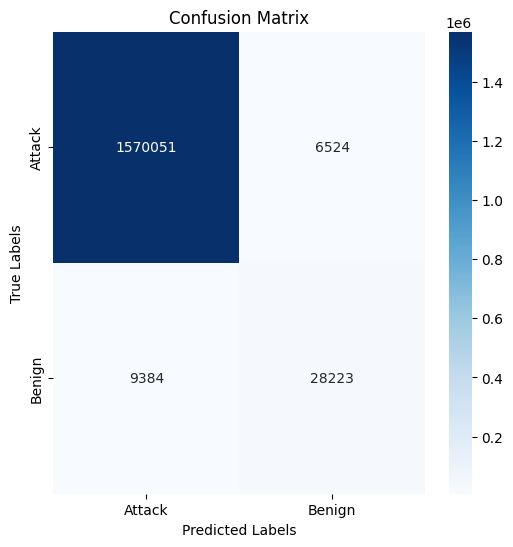

In [ ]:
plot_confusion_matrix(y_test_binary,  predictions, class_names=['Attack', 'Benign'])

### Deep Neural Network (DNN)

In [ ]:

# Define the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Train

In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train_binary,
    epochs=4,
    batch_size=128,
    verbose=1
)


Epoch 1/4
44756/44756 ━━━━━━━━━━━━━━━━━━━━ 90s 2ms/step - accuracy: 0.9958 - loss: 0.0117
Epoch 2/4
44756/44756 ━━━━━━━━━━━━━━━━━━━━ 139s 2ms/step - accuracy: 0.9972 - loss: 0.0069
Epoch 3/4
44756/44756 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step - accuracy: 0.9972 - loss: 0.0067
Epoch 4/4
44756/44756 ━━━━━━━━━━━━━━━━━━━━ 144s 2ms/step - accuracy: 0.9973 - loss: 0.0066


#### Validation


In [ ]:
validation = model.predict(X_val)

44756/44756 ━━━━━━━━━━━━━━━━━━━━ 90s 2ms/step


#### Test

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_binary, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
dnn_predictions = model.predict(X_test)

50444/50444 ━━━━━━━━━━━━━━━━━━━━ 70s 1ms/step


In [ ]:
dnn_predictions = (dnn_predictions > 0.5).astype(int)

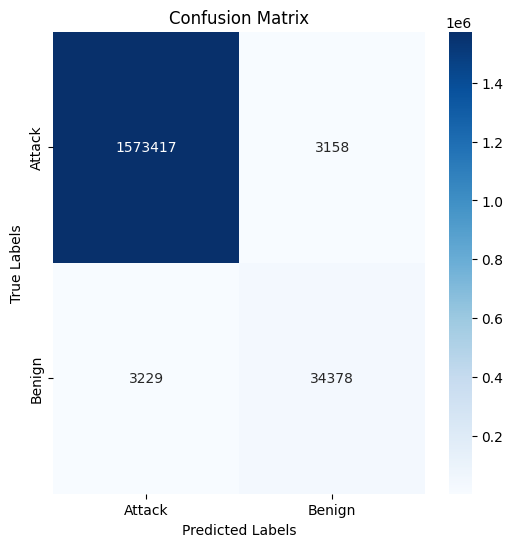

In [ ]:
plot_confusion_matrix(y_test_binary,  dnn_predictions, class_names=['Attack', 'Benign'])

In [ ]:
print(classification_report(y_test_binary, dnn_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1576575
           1       0.92      0.91      0.92     37607

    accuracy                           1.00   1614182
   macro avg       0.96      0.96      0.96   1614182
weighted avg       1.00      1.00      1.00   1614182



## Categorical Classification (6 Classes)



For this we would first have to map all 19 classes label to 6 classes


1.   Spoofing
2.   Recon
3.   MQTT
4.   Benign
5.   DoS
6.   DDoS


In [ ]:
# Mapping the y label to their repective category class
label_mapping = {
    'ARP_Spoofing': 'Spoofing',
    'Recon-Port_Scan': 'Recon',
    'Recon-OS_Scan': 'Recon',
    'Recon-VulScan': 'Recon',
    'Recon-Ping_Sweep': 'Recon',
    'Benign': 'Benign',
    'MQTT-DDoS-Connect_Flood': 'MQTT',
    'MQTT-DoS-Publish_Flood': 'MQTT',
    'MQTT-DDoS-Publish_Flood': 'MQTT',
    'MQTT-DoS-Connect_Flood': 'MQTT',
    'MQTT-Malformed_Data': 'MQTT',
    'TCP_IP-DDoS-UDP': 'DDoS',
    'TCP_IP-DDoS-ICMP': 'DDoS',
    'TCP_IP-DDoS-TCP': 'DDoS',
    'TCP_IP-DDoS-SYN': 'DDoS',
    'TCP_IP-DoS-UDP': 'DoS',
    'TCP_IP-DoS-SYN': 'DoS',
    'TCP_IP-DoS-ICMP': 'DoS',
    'TCP_IP-DoS-TCP': 'DoS',
}

# Replace labels in the 'label' column of y column with the new category names
y_cat_train = y_train['label'].replace(label_mapping)
y_cat_val = y_val['label'].replace(label_mapping)
y_cat_test = y_test['label'].replace(label_mapping)

In [ ]:
y_cat_train.value_counts()

label
DDoS        3823887
DoS         1444422
MQTT         210350
Benign       154186
Recon         82981
Spoofing      12838
Name: count, dtype: int64

In [ ]:
# Encode the labels
encoder = LabelEncoder()
y_cat_train_encoded = encoder.fit_transform(y_cat_train)
y_cat_val_encoded = encoder.transform(y_cat_val)
y_cat_test_encoded = encoder.transform(y_cat_test)

# Check the mapping
class_mapping = {index: label for index, label in enumerate(encoder.classes_)}
print("Class Mapping:", class_mapping)


Class Mapping: {0: 'Benign', 1: 'DDoS', 2: 'DoS', 3: 'MQTT', 4: 'Recon', 5: 'Spoofing'}


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert data to GPU arrays
X_train_cat_gpu = cp.array(X_train_scaled)
y_train_cat_gpu = cp.array(y_cat_train_encoded)
X_val_cat_gpu = cp.array(X_val_scaled)
y_val_cat_gpu = cp.array(y_cat_val_encoded)
X_test_cat_gpu = cp.array(X_test_scaled)
y_test_cat_gpu = cp.array(y_cat_test_encoded)

### Random Forest
GPU Accelerated cuML based algorithm

Cudf modules require the dataframes to be converted to cudf.Dataframe which is gpu implementation of the pandas library.

In [ ]:

# Enhanced Random Forest Parameters
rf_cat_model = RandomForestClassifier(
    n_estimators=100,         # Increase the number of trees for stability
    max_depth=15,             # Allow trees to grow deeper for complex patterns
    min_samples_split=5,      # Minimum samples required to split a node
    min_samples_leaf=2,       # Minimum samples per leaf
    max_features="sqrt",      # Use a subset of features for diversity
    bootstrap=True,           # Use bootstrap sampling
    random_state=42           # Ensures reproducibility
)

#### Train

In [ ]:
# Fit the model
rf_cat_model.fit(X_train_cat_gpu, y_train_cat_gpu)

In [ ]:
# Make predictions
train_preds = rf_cat_model.predict(X_train_cat_gpu)

In [ ]:
train_preds

array([2, 1, 1, ..., 1, 0, 2])


Training Set Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97    154186
        DDoS       1.00      1.00      1.00   3823887
         DoS       1.00      1.00      1.00   1444422
        MQTT       1.00      0.99      0.99    210350
       Recon       1.00      0.95      0.97     82981
    Spoofing       0.78      0.73      0.75     12838

    accuracy                           1.00   5728664
   macro avg       0.95      0.94      0.95   5728664
weighted avg       1.00      1.00      1.00   5728664


Training Set Balanced Accuracy: 0.9442


Exception ignored in: <cyfunction RandomForestClassifier.__del__ at 0x7cd117cd4860>
Traceback (most recent call last):
  File "randomforestclassifier.pyx", line 317, in cuml.ensemble.randomforestclassifier.RandomForestClassifier.__del__
  File "randomforestclassifier.pyx", line 321, in cuml.ensemble.randomforestclassifier.RandomForestClassifier._reset_forest_data
  File "base.pyx", line 330, in cuml.internals.base.Base.__getattr__
AttributeError: rf_forest


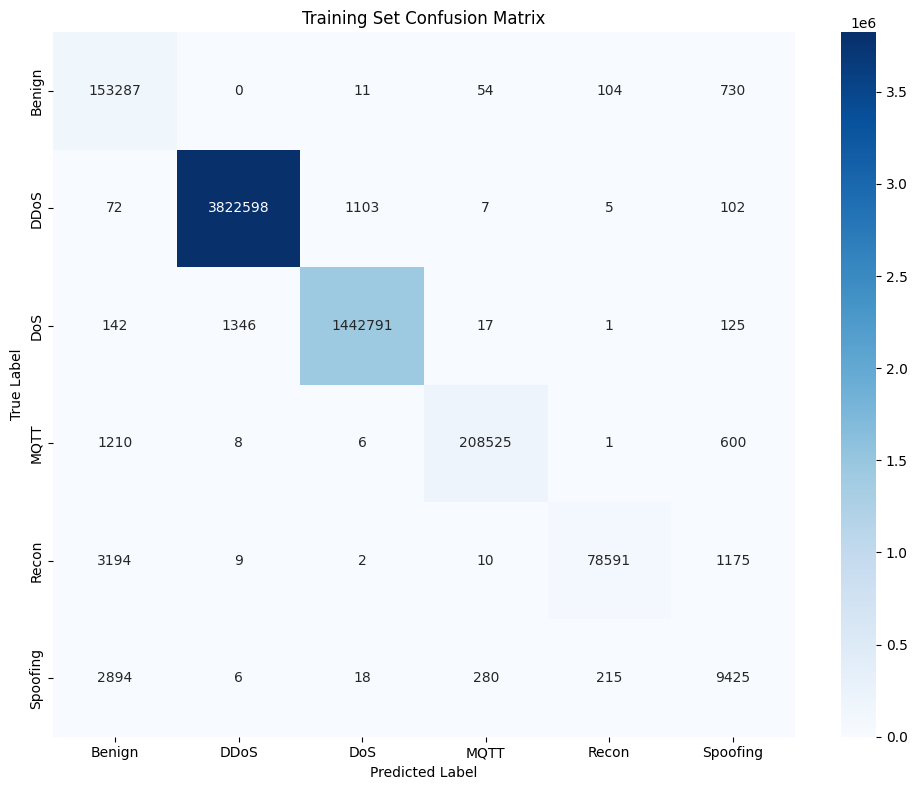

In [ ]:
evaluate_predictions(y_train_cat_gpu, train_preds, y_train,
                    encoder, "Training Set")

#### Validation

*Since, we have imbalanced dataset there is a chance that our training data might overfit so we would compare the outcome on the validation dataset and then test dataset.*


In [ ]:
val_preds = rf_cat_model.predict(X_val_cat_gpu)


Validation Set Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97     38546
        DDoS       1.00      1.00      1.00    955972
         DoS       1.00      1.00      1.00    361107
        MQTT       1.00      0.99      0.99     52588
       Recon       0.99      0.94      0.97     20745
    Spoofing       0.76      0.71      0.73      3209

    accuracy                           1.00   1432167
   macro avg       0.95      0.94      0.94   1432167
weighted avg       1.00      1.00      1.00   1432167


Validation Set Balanced Accuracy: 0.9390


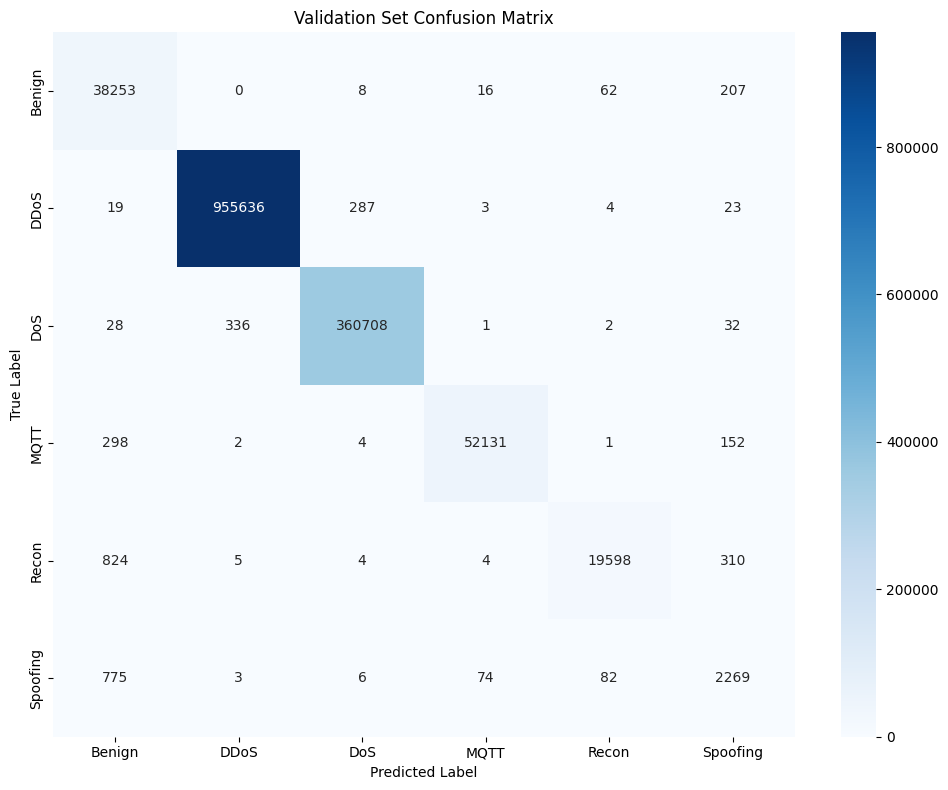

In [ ]:
evaluate_predictions(y_val_cat_gpu, val_preds, y_val,
                     encoder, "Validation Set")

#### Test

*Now tesing the model on the Test Dataset*

In [ ]:
test_preds = rf_cat_model.predict(X_test_cat_gpu)


Test Set Classification Report:
              precision    recall  f1-score   support

      Benign       0.92      1.00      0.96     37607
        DDoS       1.00      1.00      1.00   1066764
         DoS       1.00      1.00      1.00    416676
        MQTT       1.00      0.99      0.99     63715
       Recon       0.97      0.93      0.95     27676
    Spoofing       0.75      0.68      0.72      1744

    accuracy                           1.00   1614182
   macro avg       0.94      0.93      0.94   1614182
weighted avg       1.00      1.00      1.00   1614182


Test Set Balanced Accuracy: 0.9327


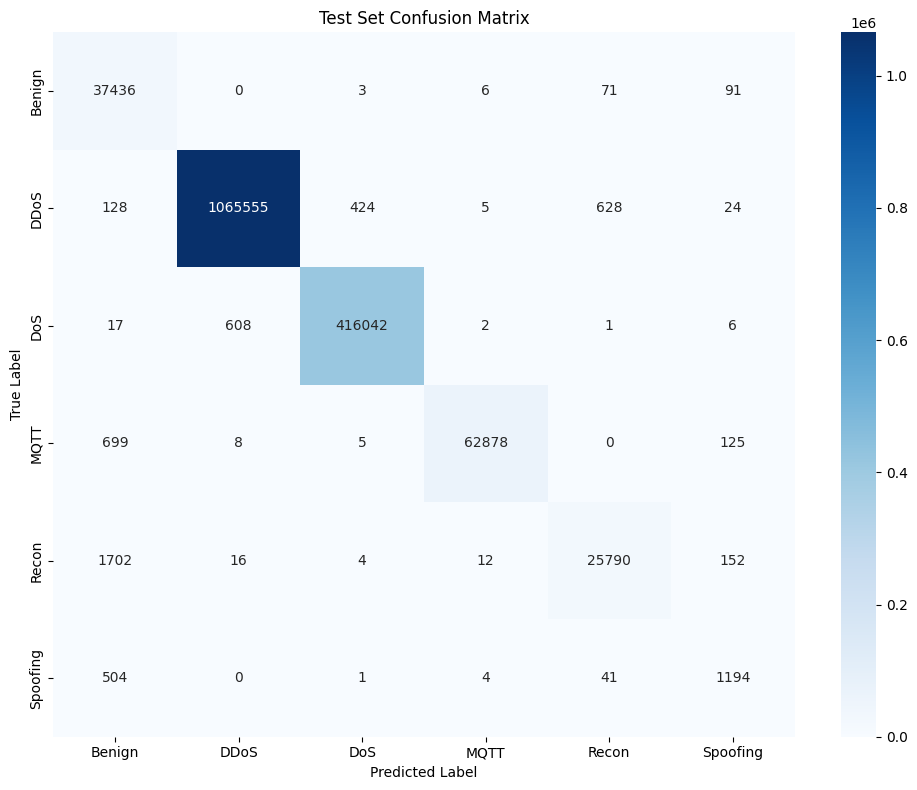

In [ ]:
evaluate_predictions(y_test_cat_gpu, test_preds, y_test,
                    encoder, "Test Set")

### XGBoost (AdaBoost alt.)

For AdaBoost, again we will use XGBoost since that's GPU accelerated.

In AdaBoost we adjust the weights of miscllasified sample giving them importance in next iteration whereas in XGBoost we focus on optimizing the loss function using the gradient descent.

In [ ]:
xgb_cat_model = XGBClassifier(
    objective = 'multi:softprob',
    num_class = len(encoder.classes_),
    eval_metric = ['mlogloss', 'merror'],

    # Tree parameters (similar to Random Forest where applicable)
    max_depth = 20,
    min_child_weight = 3,
    gamma = 0.1,

    # Regularization parameters
    learning_rate = 0.01,
    subsample = 0.8,
    colsample_bytree = 0.8,
    reg_alpha = 0.4,
    reg_lambda = 1.0,


    # Training parameters
    n_estimators = 100,  # Same as RF
    early_stopping_rounds = 20,

     # GPU-specific parameters
    device='cuda',   # GPU-accelerated algorithm
    predictor = 'gpu_predictor', # Use GPU for prediction

    random_state = 42
)


In [ ]:
# Calculate class weights
class_counts = np.bincount(cp.asnumpy(y_train_cat_gpu))
total_samples = len(y_train_cat_gpu)
class_weights = {i: total_samples / (len(class_counts) * count)
                for i, count in enumerate(class_counts)}

class_weights[5] *=2.5
class_weights[0] *=2.5


# Prepare sample weights for training
sample_weights = np.array([class_weights[y] for y in cp.asnumpy(y_train_cat_gpu)])
sample_weights

array([ 0.66100996,  0.24968764,  0.24968764, ...,  0.24968764,
       15.48093428,  0.66100996])

#### Train

In [ ]:
 # Train the model with early stopping
print("Training XGBoost model...")
xgb_cat_model.fit(
    cp.asnumpy(X_train_cat_gpu),
    cp.asnumpy(y_train_cat_gpu),
    sample_weight=sample_weights,
    eval_set=[(cp.asnumpy(X_val_cat_gpu), cp.asnumpy(y_val_cat_gpu))],
    verbose=100
)

Training XGBoost model...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:07:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.76197	validation_0-merror:0.00247
[99]	validation_0-mlogloss:0.55544	validation_0-merror:0.00149


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=20,
              enable_categorical=False, eval_metric=['mlogloss', 'merror'],
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=6, num_parallel_tree=None, ...)

In [ ]:
# Make predictions (reuse prediction variables)
xgb_train_preds = xgb_cat_model.predict(cp.asnumpy(X_train_cat_gpu))


Training Set Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99    154186
        DDoS       1.00      1.00      1.00   3823887
         DoS       1.00      1.00      1.00   1444422
        MQTT       1.00      1.00      1.00    210350
       Recon       1.00      0.98      0.99     82981
    Spoofing       0.78      1.00      0.88     12838

    accuracy                           1.00   5728664
   macro avg       0.96      0.99      0.98   5728664
weighted avg       1.00      1.00      1.00   5728664


Training Set Balanced Accuracy: 0.9941


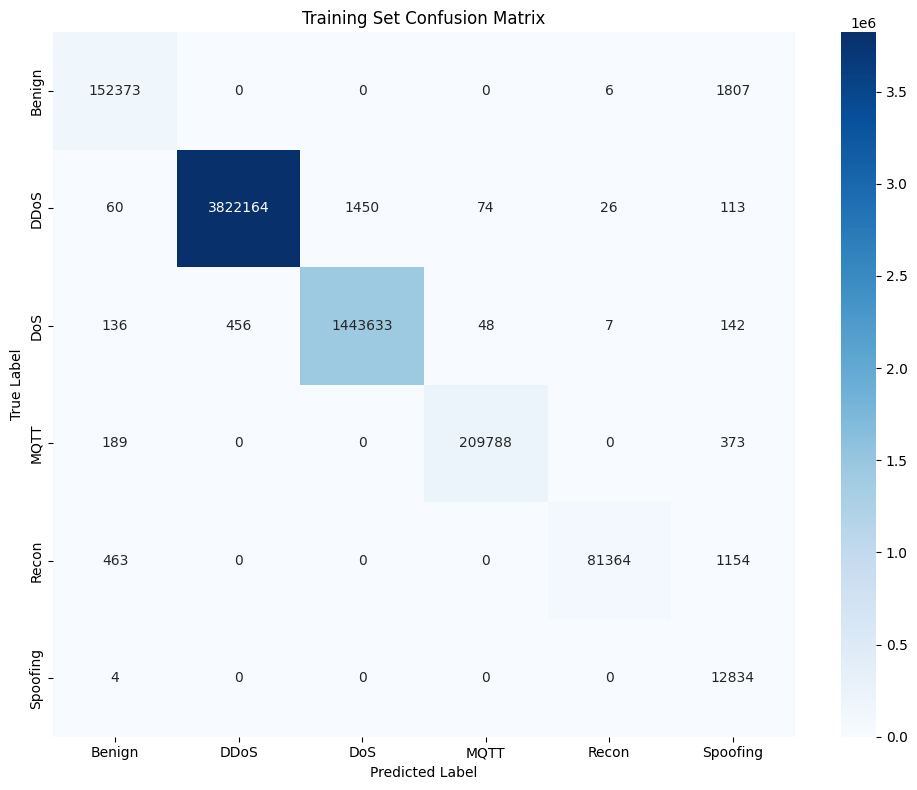

In [ ]:
evaluate_predictions(y_train_cat_gpu, xgb_train_preds, y_train,
                    encoder, "Training Set")

#### Validation


In [ ]:
# Predictions
xgb_val_preds = xgb_cat_model.predict(cp.asnumpy(X_val_cat_gpu))


Validation Set Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.98      0.99     38546
        DDoS       1.00      1.00      1.00    955972
         DoS       1.00      1.00      1.00    361107
        MQTT       1.00      1.00      1.00     52588
       Recon       1.00      0.97      0.99     20745
    Spoofing       0.74      0.96      0.84      3209

    accuracy                           1.00   1432167
   macro avg       0.95      0.99      0.97   1432167
weighted avg       1.00      1.00      1.00   1432167


Validation Set Balanced Accuracy: 0.9853


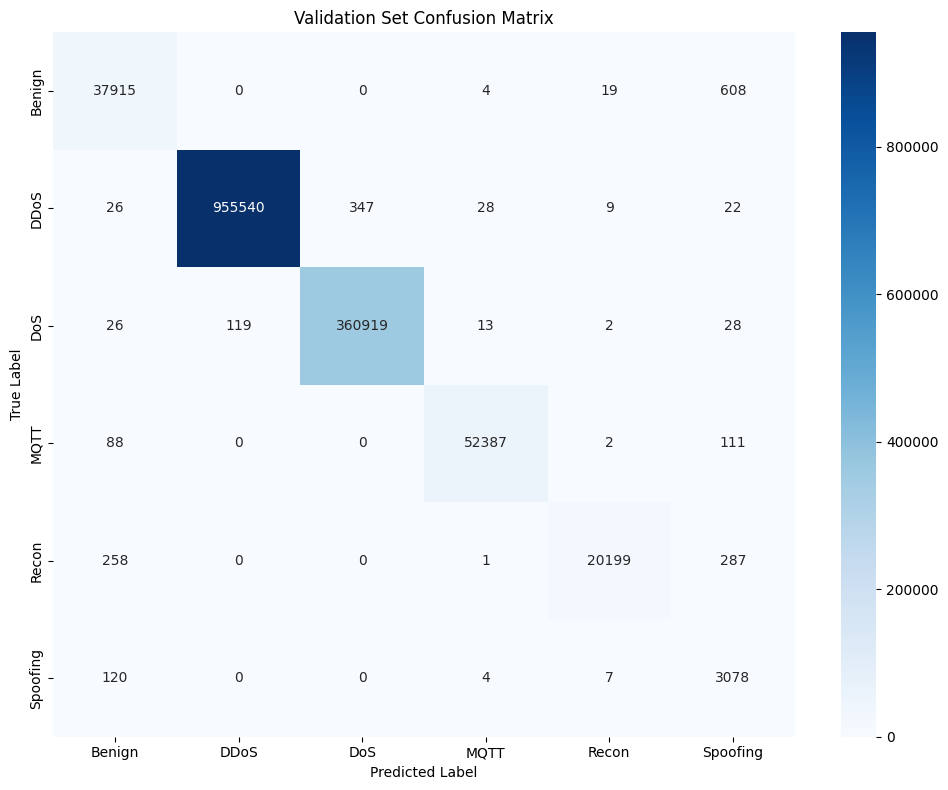

In [ ]:
# Evaluate
evaluate_predictions(y_val_cat_gpu, xgb_val_preds, y_val,
                     encoder, "Validation Set")

#### Test

In [ ]:
# Predictions
xgb_test_preds = xgb_cat_model.predict(cp.asnumpy(X_test_cat_gpu))


Test Set Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97     37607
        DDoS       1.00      1.00      1.00   1066764
         DoS       1.00      1.00      1.00    416676
        MQTT       1.00      0.99      1.00     63715
       Recon       0.97      0.97      0.97     27676
    Spoofing       0.38      0.79      0.52      1744

    accuracy                           1.00   1614182
   macro avg       0.89      0.95      0.91   1614182
weighted avg       1.00      1.00      1.00   1614182


Test Set Balanced Accuracy: 0.9518


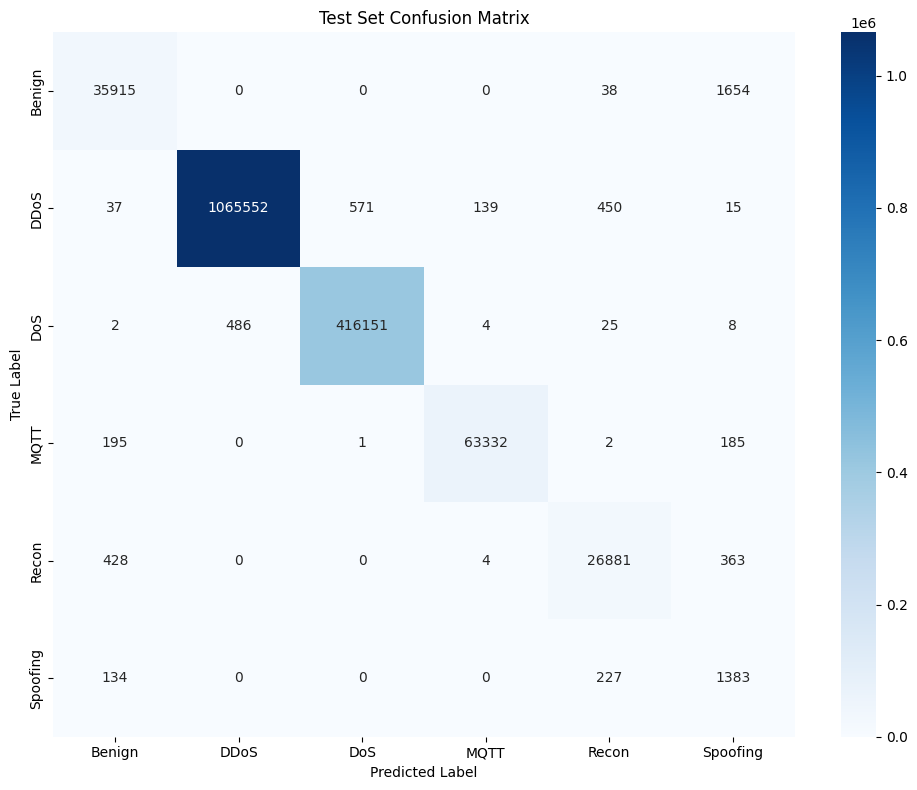

In [ ]:
evaluate_predictions(y_test_cat_gpu, xgb_test_preds, y_test,
                    encoder, "Test Set")

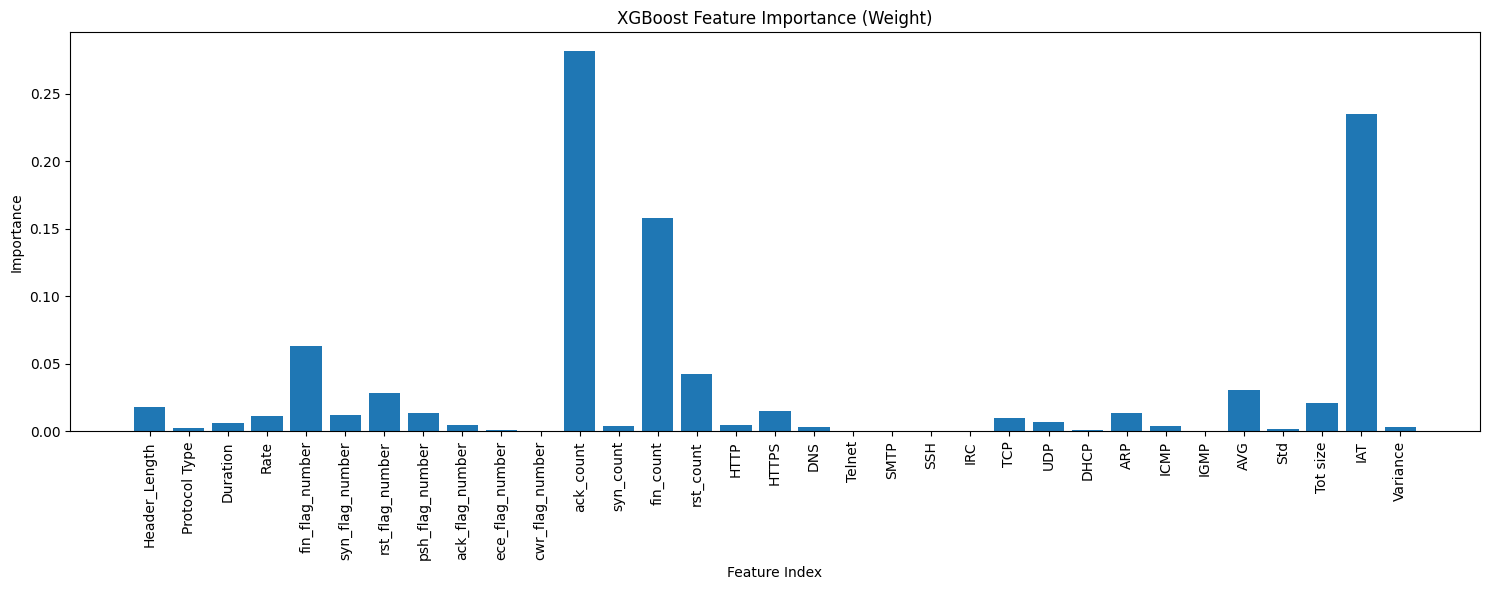

In [ ]:
# Plot feature importance
importance_type = 'weight'
plt.figure(figsize=(15, 6))
importances = xgb_cat_model.feature_importances_
plt.bar(X_test.columns, importances)
plt.title('XGBoost Feature Importance (Weight)')
plt.xticks(rotation=90)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

### Logistic Regression

#### Train

In [ ]:

# Class distribution
class_labels = encoder.classes_  # ['Benign', 'DDoS', 'DoS', 'MQTT', 'Recon', 'Spoofing']
y_train_cpu = cp.asnumpy(y_train_cat_gpu)

# Compute original class weights
original_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_cpu),
    y=y_train_cpu,
)

# Map the class weights
class_weights = {i: weight for i, weight in enumerate(original_weights)}

# Adjust weights: Reduce DDoS and Benign, Increase others
adjusted_weights = {
    0: class_weights[0] * 0.5,  # Reduce 'Benign'
    1: class_weights[1] * 0.5,  # Reduce 'DDoS'
    2: class_weights[2] * 5,  # Increase 'DoS'
    3: class_weights[3] * 2.5,  # Increase 'MQTT'
    4: class_weights[4] * 2.0,  # Increase 'Recon'
    5: class_weights[5] * 2.0,  # Increase 'Spoofing'
}


In [ ]:
adjusted_weights

{0: 3.0961868565671766,
 1: 0.12484382165756118,
 2: 3.3050498169279248,
 3: 11.347484351477696,
 4: 23.011950526827427,
 5: 148.7423793945059}

In [ ]:
# Initialize Logistic Regression with class weighting
lr_model = LogisticRegression(
    penalty='l2',                     # L2 regularization
    tol=1e-4,                         # Convergence tolerance
    max_iter=600,                     # Higher iteration limit for convergence
    class_weight=adjusted_weights,    # Handle class imbalance
    fit_intercept=True,               # Include bias term
    verbose=1,                        # Enable verbosity for progress
)


In [ ]:
# Train the model
lr_model.fit(X_train_cat_gpu, y_cat_train_encoded)

LogisticRegression()

In [ ]:
train_preds_lr = lr_model.predict(X_train_cat_gpu)


Training Set Classification Report:
              precision    recall  f1-score   support

      Benign       0.88      0.95      0.91    154186
        DDoS       0.75      0.97      0.85   3823887
         DoS       0.67      0.16      0.26   1444422
        MQTT       0.97      0.98      0.97    210350
       Recon       0.95      0.91      0.93     82981
    Spoofing       0.62      0.31      0.41     12838

    accuracy                           0.76   5728664
   macro avg       0.81      0.71      0.72   5728664
weighted avg       0.75      0.76      0.71   5728664


Training Set Balanced Accuracy: 0.7115


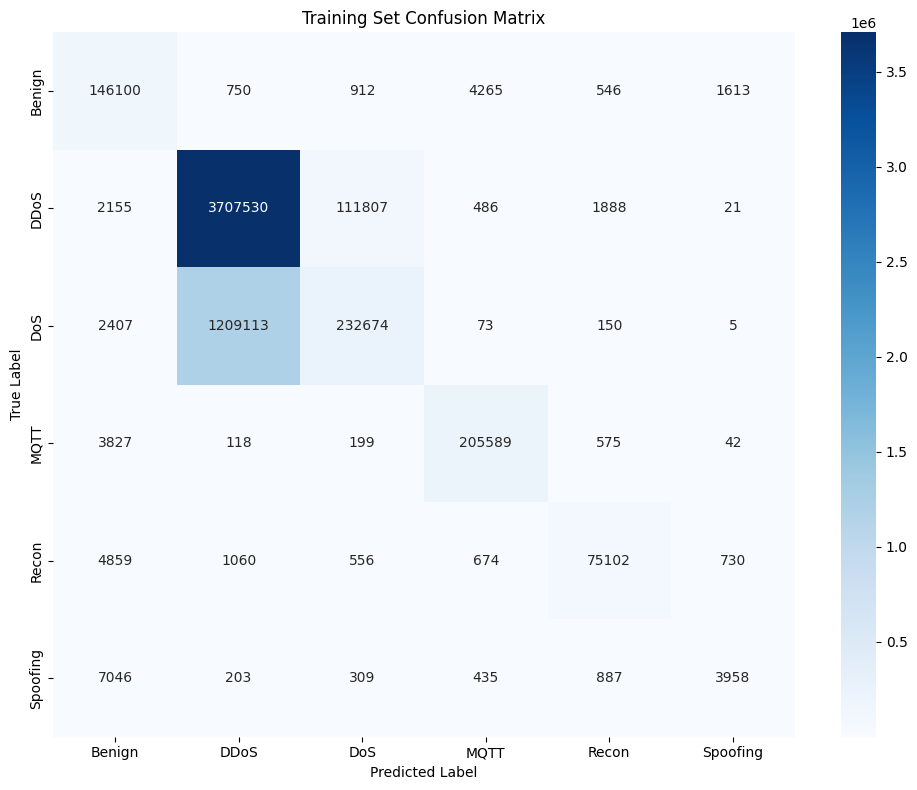

In [ ]:
evaluate_predictions(y_cat_train_encoded, train_preds_lr, y_train,
                    encoder, "Training Set")

#### Validation


In [ ]:
# Validate the model
val_preds_lr = lr_model.predict(X_val_cat_gpu)


Validation Set Classification Report:
              precision    recall  f1-score   support

      Benign       0.88      0.95      0.91     38546
        DDoS       0.75      0.97      0.85    955972
         DoS       0.67      0.16      0.26    361107
        MQTT       0.97      0.98      0.97     52588
       Recon       0.95      0.91      0.93     20745
    Spoofing       0.63      0.32      0.42      3209

    accuracy                           0.76   1432167
   macro avg       0.81      0.71      0.72   1432167
weighted avg       0.75      0.76      0.71   1432167


Validation Set Balanced Accuracy: 0.7133


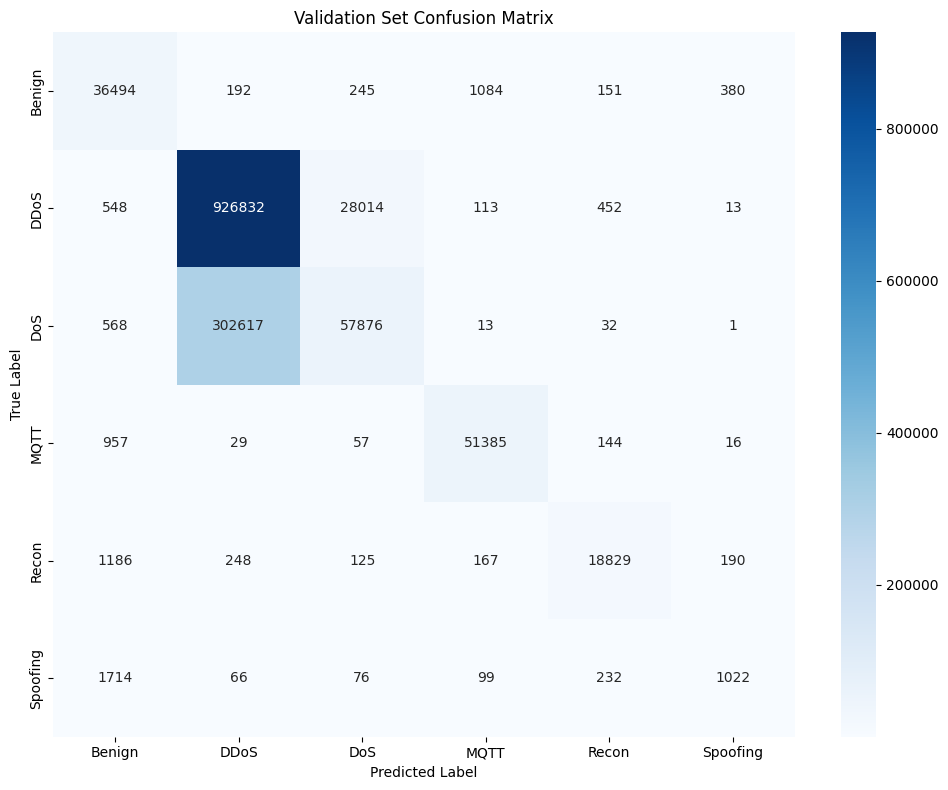

In [ ]:
evaluate_predictions(y_cat_val_encoded, val_preds_lr, y_val,
                    encoder, "Validation Set")

#### Test


Test Set Classification Report:
              precision    recall  f1-score   support

      Benign       0.87      0.88      0.88     37607
        DDoS       0.75      0.99      0.85   1066764
         DoS       0.82      0.16      0.27    416676
        MQTT       0.98      0.97      0.98     63715
       Recon       0.94      0.89      0.92     27676
    Spoofing       0.24      0.46      0.31      1744

    accuracy                           0.77   1614182
   macro avg       0.77      0.73      0.70   1614182
weighted avg       0.78      0.77      0.71   1614182


Test Set Balanced Accuracy: 0.7256


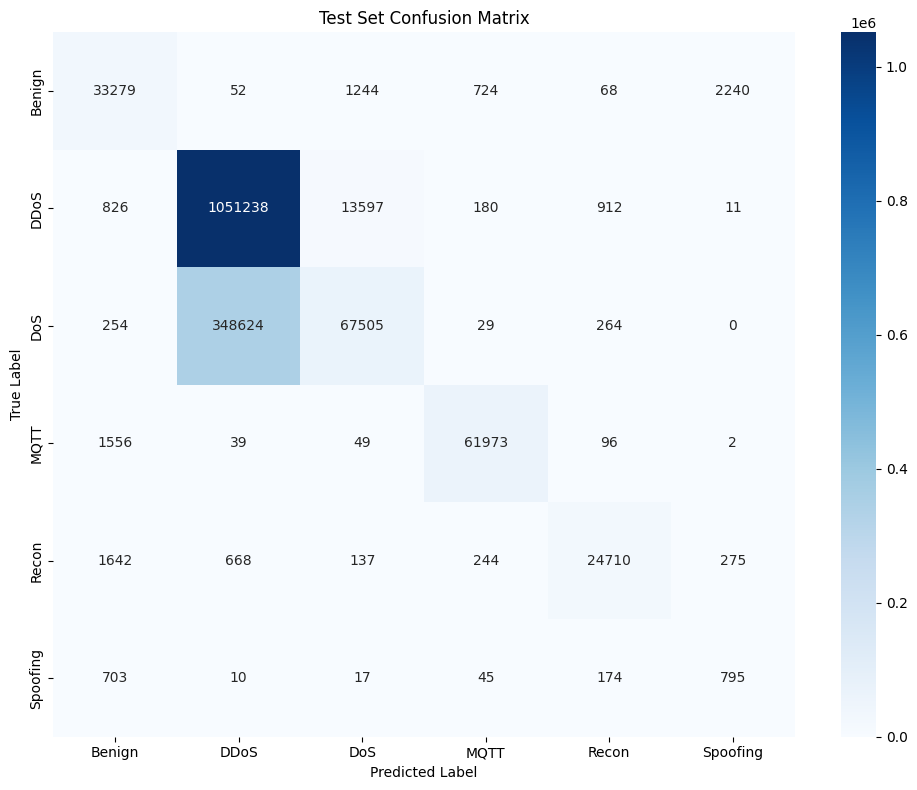

In [ ]:
test_preds_lr = lr_model.predict(X_test_cat_gpu)
evaluate_predictions(y_cat_test_encoded, test_preds_lr, y_test,
                    encoder, "Test Set")

### Deep Neural Network (DNN)

In [ ]:
# Encode labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_cat_train)
y_val_encoded = label_encoder.transform(y_cat_val)
y_test_encoded = label_encoder.transform(y_cat_test)

# One-hot encode the labels
y_train_onehot = tf.keras.utils.to_categorical(y_train_encoded)
y_val_onehot = tf.keras.utils.to_categorical(y_val_encoded)
y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded)

In [ ]:
# Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Class Weights:", class_weight_dict)


Class Weights: {0: 6.192373713134353, 1: 0.24968764331512236, 2: 0.6610099633855849, 3: 4.538993740591079, 4: 11.505975263413713, 5: 74.37118969725294}


In [ ]:
# Define the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')        # Output layer
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#### Train

In [ ]:
# Train the model
history = model.fit(
    X_train_scaled, y_train_onehot,
    validation_data=(X_val_scaled, y_val_onehot),
    epochs=4,
    batch_size=32,
    verbose=1
)

Epoch 1/4
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 294s 2ms/step - accuracy: 0.7799 - loss: 0.4861 - val_accuracy: 0.7971 - val_loss: 0.4433
Epoch 2/4
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 291s 2ms/step - accuracy: 0.7928 - loss: 0.4568 - val_accuracy: 0.7985 - val_loss: 0.4386
Epoch 3/4
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 294s 2ms/step - accuracy: 0.7942 - loss: 0.4559 - val_accuracy: 0.7987 - val_loss: 0.4373
Epoch 4/4
179021/179021 ━━━━━━━━━━━━━━━━━━━━ 291s 2ms/step - accuracy: 0.7949 - loss: 0.4579 - val_accuracy: 0.8002 - val_loss: 0.4365


#### Validation


In [ ]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_val_scaled, y_val_onehot, verbose=0)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

Validation Loss: 0.43652093410491943
Validation Accuracy: 0.8002278804779053


#### Test

In [ ]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_onehot, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

Test Loss: 0.5019538402557373
Test Accuracy: 0.7863301634788513


In [ ]:
test_preds = model.predict(X_test_scaled)

# Convert predictions to class labels
test_classes = np.argmax(test_preds, axis=1)
y_test_classes = np.argmax(y_test_onehot, axis=1)


print(classification_report(y_test_classes, test_classes))

50444/50444 ━━━━━━━━━━━━━━━━━━━━ 51s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     37607
           1       0.78      0.96      0.86   1066764
           2       0.74      0.29      0.42    416676
           3       1.00      0.98      0.99     63715
           4       0.98      0.91      0.94     27676
           5       0.23      0.56      0.33      1744

    accuracy                           0.79   1614182
   macro avg       0.77      0.77      0.74   1614182
weighted avg       0.78      0.79      0.75   1614182



## Multi-Class Classification (All Classes)



In this section we will classify all the 19 classes


1.  TCP_IP-DDoS-UDP
2.  TCP_IP-DDoS-ICMP
3.  TCP_IP-DDoS-TCP
4.  TCP_IP-DDoS-SYN
5.  TCP_IP-DoS-UDP
6.  TCP_IP-DoS-SYN
7.  TCP_IP-DoS-ICMP
8.  TCP_IP-DoS-TCP
9.  Benign
10.  MQTT-DDoS-Connect_Flood
11. Recon-Port_Scan
12. MQTT-DoS-Publish_Flood
13. MQTT-DDoS-Publish_Flood
14. Recon-OS_Scan
15. ARP_Spoofing
16. MQTT-DoS-Connect_Flood
17. MQTT-Malformed_Data
18. Recon-VulScan
19. Recon-Ping_Sweep




*First, we will encode the multiclass variable into numerical form, so that algorithms could interpret it accordingly.*


In [ ]:
# First encode the string labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

*We would need to convert these np_array to the GPU format array.*

In [ ]:
# Convert data to GPU arrays
X_train_gpu = cp.array(X_train)
y_train_gpu = cp.array(y_train_encoded)
X_val_gpu = cp.array(X_val)
y_val_gpu = cp.array(y_val_encoded)
X_test_gpu = cp.array(X_test)
y_test_gpu = cp.array(y_test_encoded)

### Random Forest
GPU Accelerated cuML based algorithm

*Intializing the Random Forest Classifier*

In [ ]:
# Initialize and train the GPU Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100, # No. of trees
    max_depth=10,     # Maximum depth of each tree
    random_state=42   # Randomizing the samples
)

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)


#### Train

*Training the model on the GPU*

In [ ]:
# Fit the model
rf_model.fit(X_train_gpu, y_train_gpu)

In [ ]:
# Make predictions
train_preds = rf_model.predict(X_train_gpu)

#### Validation

*Since, we have imbalanced dataset there is a chance that our training data might overfit so we would compare the outcome on the validation dataset and then test dataset.*


In [ ]:
val_preds = rf_model.predict(X_val_gpu)

In [ ]:
val_probs = rf_model.predict_proba(X_val_gpu)

In [ ]:
# Convert predictions back to CPU and original labels
val_preds_labels = label_encoder.inverse_transform(cp.asnumpy(val_preds))

# Calculate accuracy
val_accuracy = (val_preds == y_val_gpu).sum() / len(y_val_gpu)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Accuracy: 0.9935


#### Test

*Now tesing the model on the Test Dataset*

In [ ]:
test_preds = rf_model.predict(X_test_gpu)

In [ ]:
# Convert predictions back to CPU and original labels
test_preds_labels = label_encoder.inverse_transform(cp.asnumpy(test_preds))

# Calculate accuracy
test_accuracy = (test_preds == y_test_gpu).sum() / len(y_test_gpu)
print(f"Test Accuracy: {test_accuracy:.4f}")



Test Accuracy: 0.9882



Training Set Classification Report:
                         precision    recall  f1-score   support

           ARP_Spoofing       0.67      0.48      0.56     12838
                 Benign       0.90      0.99      0.94    154186
MQTT-DDoS-Connect_Flood       0.99      1.00      1.00    138429
MQTT-DDoS-Publish_Flood       0.99      0.99      0.99     22098
 MQTT-DoS-Connect_Flood       1.00      0.96      0.98     10218
 MQTT-DoS-Publish_Flood       0.99      1.00      0.99     35501
    MQTT-Malformed_Data       0.89      0.16      0.27      4104
          Recon-OS_Scan       0.96      0.18      0.31     13466
       Recon-Ping_Sweep       0.80      0.55      0.65       592
        Recon-Port_Scan       0.86      0.94      0.90     67185
          Recon-VulScan       1.00      0.01      0.02      1738
       TCP_IP-DDoS-ICMP       1.00      1.00      1.00   1229981
        TCP_IP-DDoS-SYN       1.00      1.00      1.00    641569
        TCP_IP-DDoS-TCP       1.00      1.00      1.

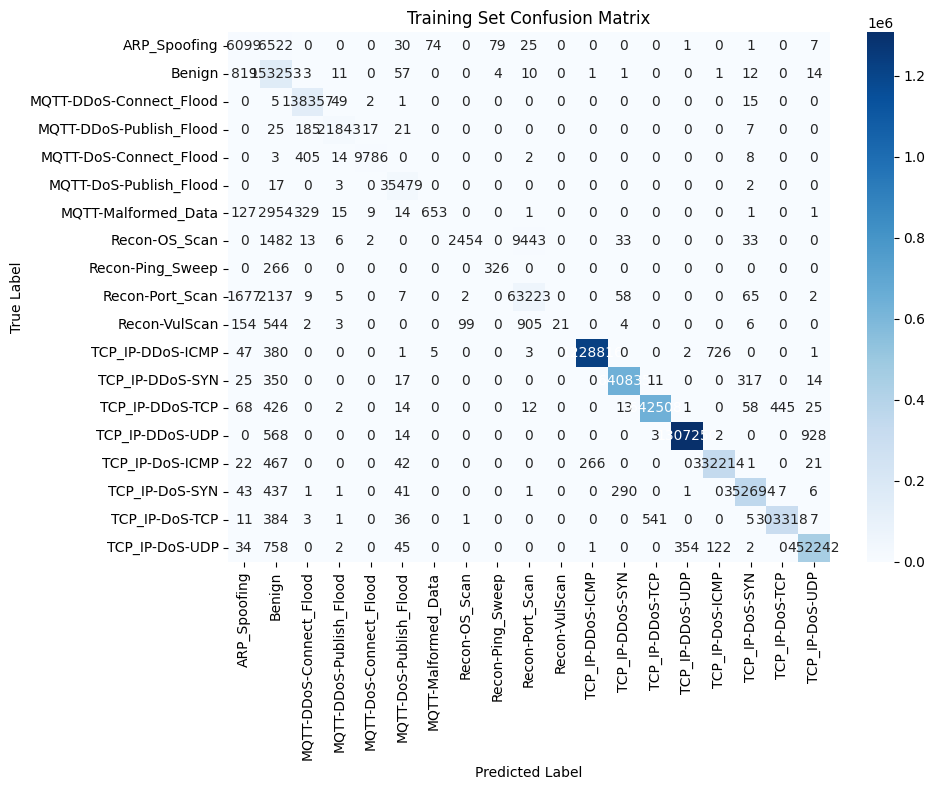


Validation Set Classification Report:
                         precision    recall  f1-score   support

           ARP_Spoofing       0.66      0.48      0.56      3209
                 Benign       0.90      0.99      0.94     38546
MQTT-DDoS-Connect_Flood       0.99      1.00      1.00     34607
MQTT-DDoS-Publish_Flood       0.99      0.99      0.99      5525
 MQTT-DoS-Connect_Flood       1.00      0.95      0.97      2555
 MQTT-DoS-Publish_Flood       0.99      1.00      1.00      8875
    MQTT-Malformed_Data       0.87      0.17      0.28      1026
          Recon-OS_Scan       0.97      0.18      0.31      3366
       Recon-Ping_Sweep       0.76      0.61      0.68       148
        Recon-Port_Scan       0.86      0.94      0.90     16796
          Recon-VulScan       1.00      0.00      0.00       435
       TCP_IP-DDoS-ICMP       1.00      1.00      1.00    307495
        TCP_IP-DDoS-SYN       1.00      1.00      1.00    160393
        TCP_IP-DDoS-TCP       1.00      1.00      

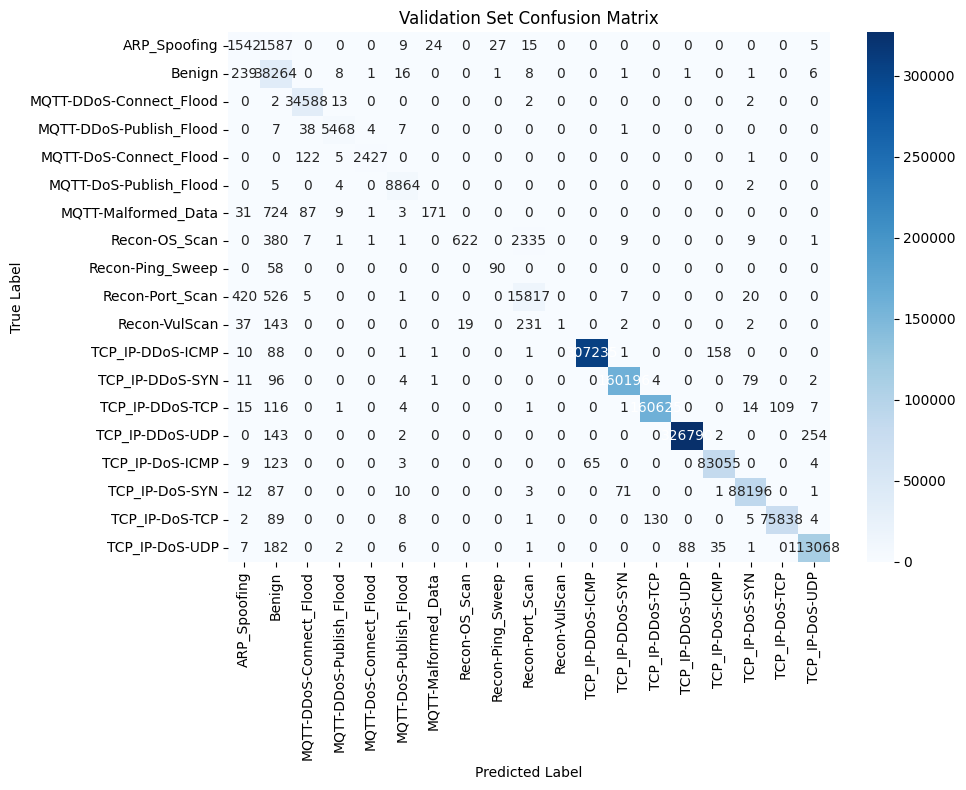


Test Set Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                         precision    recall  f1-score   support

           ARP_Spoofing       0.45      0.64      0.53      1744
                 Benign       0.88      0.97      0.93     37607
MQTT-DDoS-Connect_Flood       0.99      1.00      0.99     41916
MQTT-DDoS-Publish_Flood       0.95      0.11      0.19      8416
 MQTT-DoS-Connect_Flood       1.00      0.95      0.98      3131
 MQTT-DoS-Publish_Flood       0.54      1.00      0.70      8505
    MQTT-Malformed_Data       1.00      0.14      0.25      1747
          Recon-OS_Scan       0.93      0.18      0.30      3834
       Recon-Ping_Sweep       0.98      0.53      0.69       186
        Recon-Port_Scan       0.86      0.96      0.91     22622
          Recon-VulScan       0.00      0.00      0.00      1034
       TCP_IP-DDoS-ICMP       1.00      1.00      1.00    349699
        TCP_IP-DDoS-SYN       1.00      0.99      1.00    172397
        TCP_IP-DDoS-TCP       1.00      1.00      1.00    182598
        TCP_IP-DDoS-UDP 

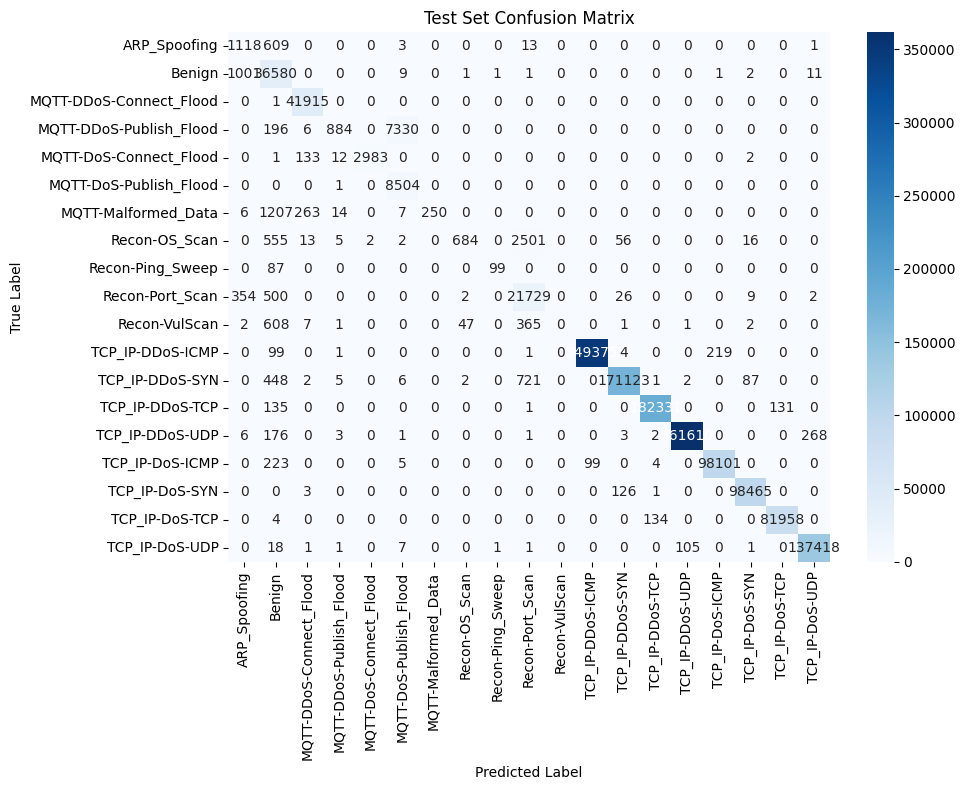

In [ ]:
# Evaluate predictions for each dataset
evaluate_predictions(y_train_gpu, train_preds, y_train,
                    label_encoder, "Training Set")
evaluate_predictions(y_val_gpu, val_preds, y_val,
                    label_encoder, "Validation Set")
evaluate_predictions(y_test_gpu, test_preds, y_test,
                    label_encoder, "Test Set")

### XGBoost (AdaBoost alt.)

For AdaBoost, again we will use XGBoost since that's GPU accelerated.

In AdaBoost we adjust the weights of miscllasified sample giving them importance in next iteration whereas in XGBoost we focus on optimizing the loss function using the gradient descent.

In [ ]:
from xgboost import XGBClassifier

*Creating the XGB_model*

In [ ]:
xgb_model = XGBClassifier(
    objective = 'multi:softprob',
    num_class = len(label_encoder.classes_),
    eval_metric = ['mlogloss', 'merror'],

    # Tree parameters (similar to Random Forest where applicable)
    max_depth = 10,  # Same as RF
    min_child_weight = 5,
    gamma = 0.1,

    # Regularization parameters
    learning_rate = 0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,

    # Training parameters
    n_estimators=100,  # Same as RF
    early_stopping_rounds= 20,

     # GPU-specific parameters
    tree_method='gpu_hist',   # GPU-accelerated histogram algorithm
    predictor='gpu_predictor', # Use GPU for prediction

    random_state=42
)


*Calculating the class wise the weight, to make sure model doesn't overfit. Since XGBoost is more prone to overfitting*

In [ ]:
# Calculate class weights
class_counts = np.bincount(cp.asnumpy(y_train_gpu))
total_samples = len(y_train_gpu)
class_weights = {i: total_samples / (len(class_counts) * count)
                for i, count in enumerate(class_counts)}

# Prepare sample weights for training
sample_weights = np.array([class_weights[y] for y in cp.asnumpy(y_train_gpu)])
sample_weights

array([0.99080413, 0.46995511, 0.24513276, ..., 0.24513276, 1.95548644,
       0.99080413])

#### Train

In [ ]:
 # Train the model with early stopping
print("Training XGBoost model...")
xgb_model.fit(
    cp.asnumpy(X_train_gpu),
    cp.asnumpy(y_train_gpu),
    sample_weight=sample_weights,
    eval_set=[(cp.asnumpy(X_val_gpu), cp.asnumpy(y_val_gpu))],
    verbose=100
)

Training XGBoost model...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:02:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:02:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:2.85646	validation_0-merror:0.00596
[99]	validation_0-mlogloss:0.71026	validation_0-merror:0.00409


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric=['mlogloss', 'merror'],
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=19, num_parallel_tree=None, ...)

#### Validation


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:04:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



Validation Set Classification Report:
                         precision    recall  f1-score   support

           ARP_Spoofing       0.70      0.91      0.79      3209
                 Benign       0.99      0.95      0.97     38546
MQTT-DDoS-Connect_Flood       1.00      1.00      1.00     34607
MQTT-DDoS-Publish_Flood       1.00      1.00      1.00      5525
 MQTT-DoS-Connect_Flood       1.00      1.00      1.00      2555
 MQTT-DoS-Publish_Flood       1.00      1.00      1.00      8875
    MQTT-Malformed_Data       0.64      0.97      0.77      1026
          Recon-OS_Scan       0.60      0.92      0.73      3366
       Recon-Ping_Sweep       0.24      0.96      0.38       148
        Recon-Port_Scan       1.00      0.86      0.92     16796
          Recon-VulScan       0.41      0.95      0.57       435
       TCP_IP-DDoS-ICMP       1.00      1.00      1.00    307495
        TCP_IP-DDoS-SYN       1.00      1.00      1.00    160393
        TCP_IP-DDoS-TCP       1.00      1.00      

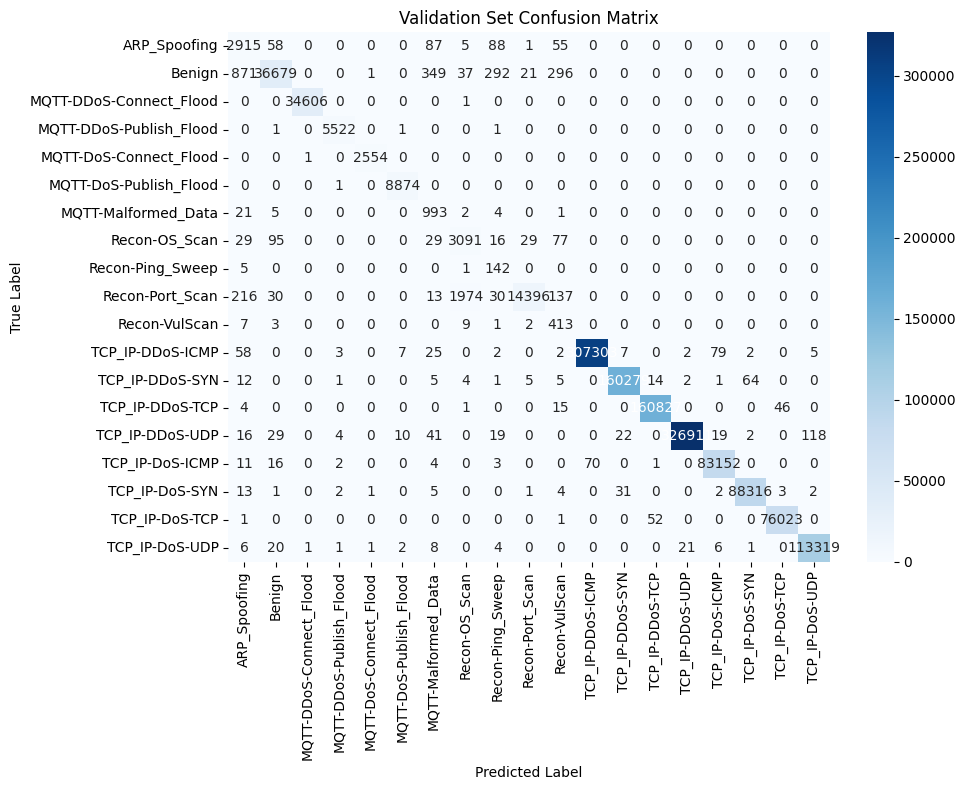

In [ ]:
# Predictions
val_preds = xgb_model.predict(cp.asnumpy(X_val_gpu))

evaluate_predictions(y_val_gpu, val_preds, y_val,
                    label_encoder, "Validation Set")

#### Test

In [ ]:
test_preds = xgb_model.predict(cp.asnumpy(X_test_gpu))


Test Set Classification Report:
                         precision    recall  f1-score   support

           ARP_Spoofing       0.30      0.75      0.43      1744
                 Benign       0.98      0.91      0.95     37607
MQTT-DDoS-Connect_Flood       1.00      1.00      1.00     41916
MQTT-DDoS-Publish_Flood       0.96      0.13      0.22      8416
 MQTT-DoS-Connect_Flood       1.00      1.00      1.00      3131
 MQTT-DoS-Publish_Flood       0.54      1.00      0.70      8505
    MQTT-Malformed_Data       0.77      0.95      0.85      1747
          Recon-OS_Scan       0.70      0.88      0.78      3834
       Recon-Ping_Sweep       0.23      0.98      0.37       186
        Recon-Port_Scan       0.95      0.91      0.93     22622
          Recon-VulScan       0.38      0.43      0.41      1034
       TCP_IP-DDoS-ICMP       1.00      1.00      1.00    349699
        TCP_IP-DDoS-SYN       1.00      0.99      1.00    172397
        TCP_IP-DDoS-TCP       1.00      1.00      1.00  

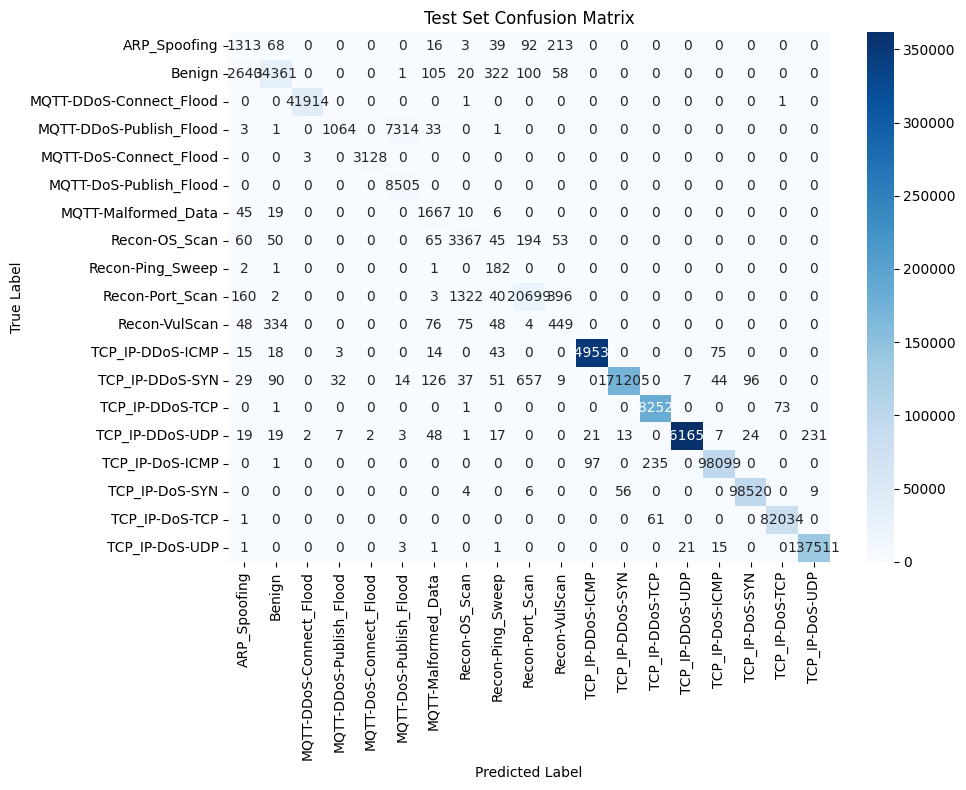

In [ ]:
evaluate_predictions(y_test_gpu, test_preds, y_test,
                    label_encoder, "Test Set")

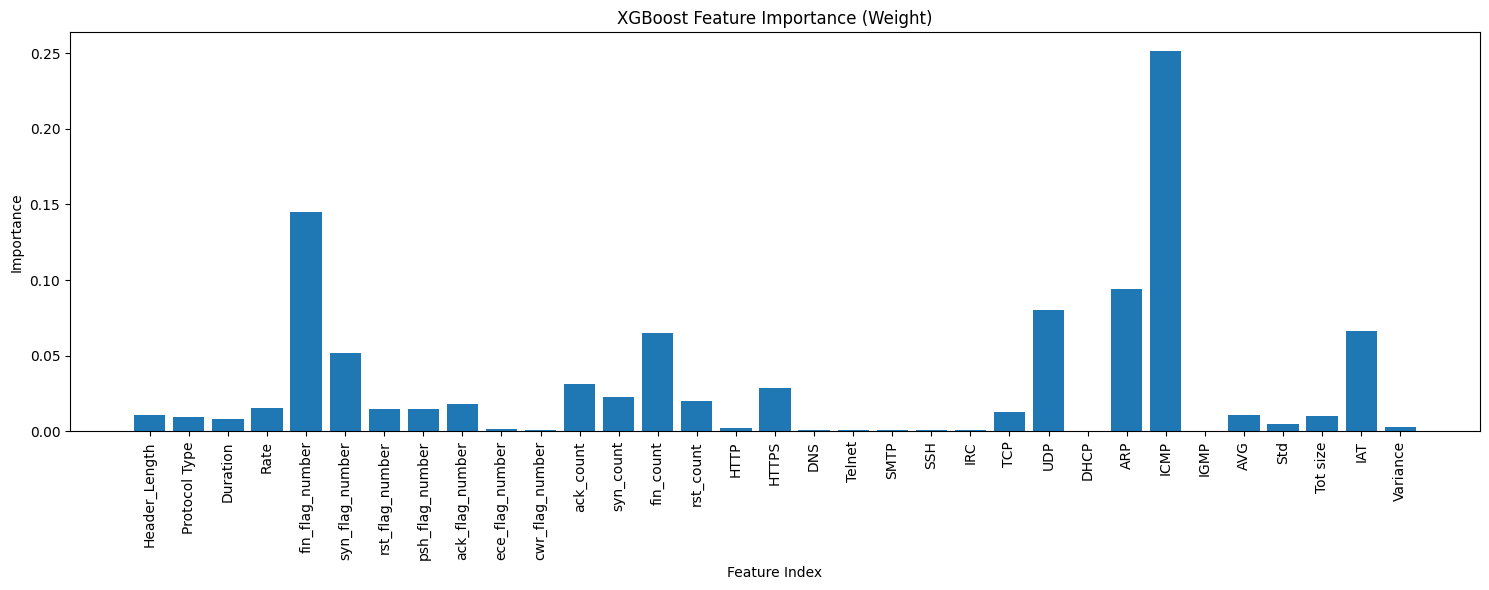

In [ ]:
# Plot feature importance
importance_type = 'weight'
plt.figure(figsize=(15, 6))
importances = xgb_model.feature_importances_
plt.bar(X_test.columns, importances)
plt.title('XGBoost Feature Importance (Weight)')
plt.xticks(rotation=90)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [ ]:
features = list(zip(importances, X_train.columns))
features.sort(reverse=True)
features

[(0.25119656, 'ICMP'),
 (0.14488728, 'fin_flag_number'),
 (0.09433207, 'ARP'),
 (0.08032651, 'UDP'),
 (0.06637528, 'IAT'),
 (0.06510338, 'fin_count'),
 (0.051621463, 'syn_flag_number'),
 (0.03125679, 'ack_count'),
 (0.028562479, 'HTTPS'),
 (0.023066418, 'syn_count'),
 (0.020197585, 'rst_count'),
 (0.018200954, 'ack_flag_number'),
 (0.0152068725, 'Rate'),
 (0.014927884, 'rst_flag_number'),
 (0.014906362, 'psh_flag_number'),
 (0.012873895, 'TCP'),
 (0.010895503, 'Header_Length'),
 (0.010858371, 'AVG'),
 (0.010027212, 'Tot size'),
 (0.0095385, 'Protocol Type'),
 (0.0082546845, 'Duration'),
 (0.004750208, 'Std'),
 (0.0029782793, 'Variance'),
 (0.0023403864, 'HTTP'),
 (0.0016721912, 'ece_flag_number'),
 (0.0010184064, 'cwr_flag_number'),
 (0.0010091903, 'DNS'),
 (0.00087980705, 'SMTP'),
 (0.0008412378, 'IRC'),
 (0.00082535367, 'SSH'),
 (0.00073120993, 'Telnet'),
 (0.0003246097, 'IGMP'),
 (1.3061972e-05, 'DHCP')]

### Logistic Regression

#### Train

We have added class_weight="balanced" to set the initial weights of each class according to no. of samples.

Penalty = "l1" and c = 0.1 are the params for Ridge Regularization(L1), our model was initially underfitting therefore we need to provide C to be lower.

In [ ]:
# Initialize and train the Logistic Regression model
clf = LogisticRegression(class_weight='balanced', max_iter=500, penalty='l1', C=0.1)

print("Training cuML Logistic Regression model...")
clf.fit(X_train_gpu, y_train_gpu)

[I] [06:51:51.338422] Unused keyword parameter: c during cuML estimator initialization
Training cuML Logistic Regression model...
[W] [06:56:52.274243] QWL-QN: max iterations reached
[W] [06:56:52.278691] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.


LogisticRegression()

#### Validation


In [ ]:
# Predict on the validation set
y_val_pred_gpu = clf.predict(X_val_gpu)

Epoch 1/3
89511/89511 ━━━━━━━━━━━━━━━━━━━━ 202s 2ms/step - accuracy: 0.9616 - loss: 2108.7087 - val_accuracy: 0.9844 - val_loss: 4528.5903
Epoch 2/3
89511/89511 ━━━━━━━━━━━━━━━━━━━━ 202s 2ms/step - accuracy: 0.9686 - loss: 2083.6350 - val_accuracy: 0.9838 - val_loss: 5997.3003
Epoch 3/3
89511/89511 ━━━━━━━━━━━━━━━━━━━━ 170s 2ms/step - accuracy: 0.9736 - loss: 1976.8628 - val_accuracy: 0.9917 - val_loss: 379.7123



Validation Set Classification Report:
                         precision    recall  f1-score   support

           ARP_Spoofing       0.48      0.36      0.41      3209
                 Benign       0.88      0.91      0.90     38546
MQTT-DDoS-Connect_Flood       0.98      0.99      0.98     34607
MQTT-DDoS-Publish_Flood       0.99      0.99      0.99      5525
 MQTT-DoS-Connect_Flood       0.95      0.74      0.84      2555
 MQTT-DoS-Publish_Flood       0.91      0.93      0.92      8875
    MQTT-Malformed_Data       0.10      0.06      0.07      1026
          Recon-OS_Scan       0.38      0.02      0.04      3366
       Recon-Ping_Sweep       0.43      0.34      0.38       148
        Recon-Port_Scan       0.80      0.92      0.86     16796
          Recon-VulScan       0.05      0.02      0.02       435
       TCP_IP-DDoS-ICMP       0.79      1.00      0.88    307495
        TCP_IP-DDoS-SYN       0.78      0.90      0.83    160393
        TCP_IP-DDoS-TCP       0.68      0.99      

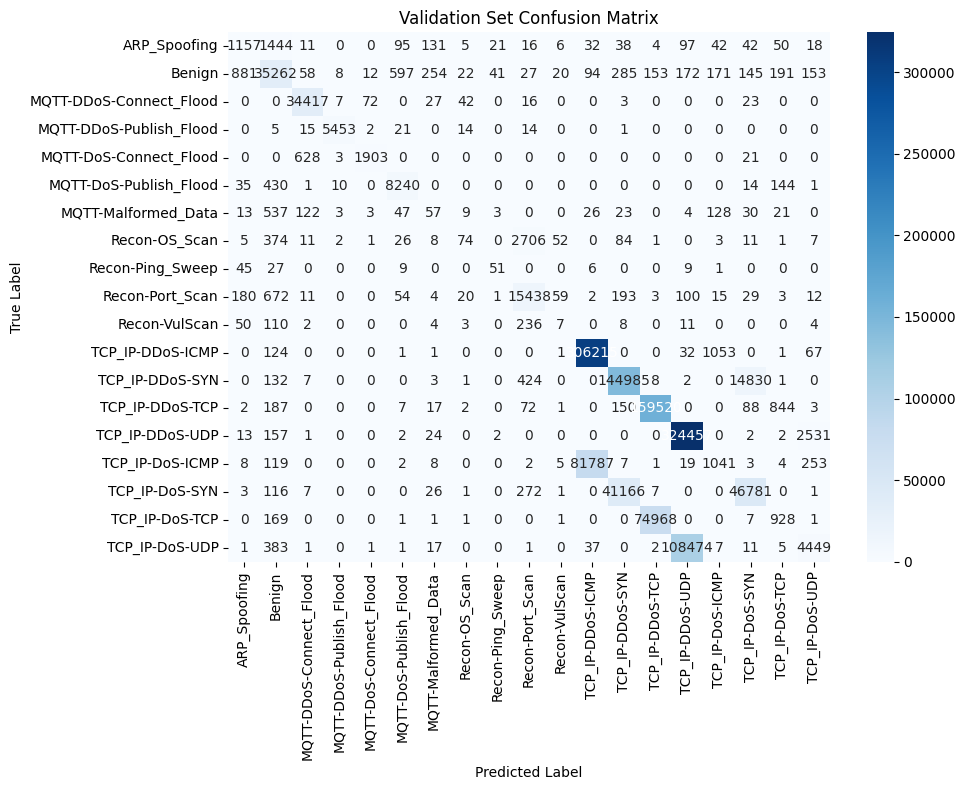

In [ ]:
evaluate_predictions(y_val_gpu, y_val_pred_gpu, y_val,
                    label_encoder, "Validation Set")

#### Test

In [ ]:
test_preds = clf.predict(X_test_gpu)


Test Set Classification Report:
                         precision    recall  f1-score   support

           ARP_Spoofing       0.25      0.53      0.34      1744
                 Benign       0.86      0.85      0.86     37607
MQTT-DDoS-Connect_Flood       0.98      1.00      0.99     41916
MQTT-DDoS-Publish_Flood       0.98      0.10      0.18      8416
 MQTT-DoS-Connect_Flood       0.99      0.83      0.90      3131
 MQTT-DoS-Publish_Flood       0.51      0.95      0.67      8505
    MQTT-Malformed_Data       0.23      0.04      0.06      1747
          Recon-OS_Scan       0.63      0.04      0.07      3834
       Recon-Ping_Sweep       0.48      0.30      0.37       186
        Recon-Port_Scan       0.83      0.93      0.88     22622
          Recon-VulScan       0.12      0.01      0.02      1034
       TCP_IP-DDoS-ICMP       0.78      1.00      0.88    349699
        TCP_IP-DDoS-SYN       0.75      0.94      0.84    172397
        TCP_IP-DDoS-TCP       0.69      1.00      0.82  

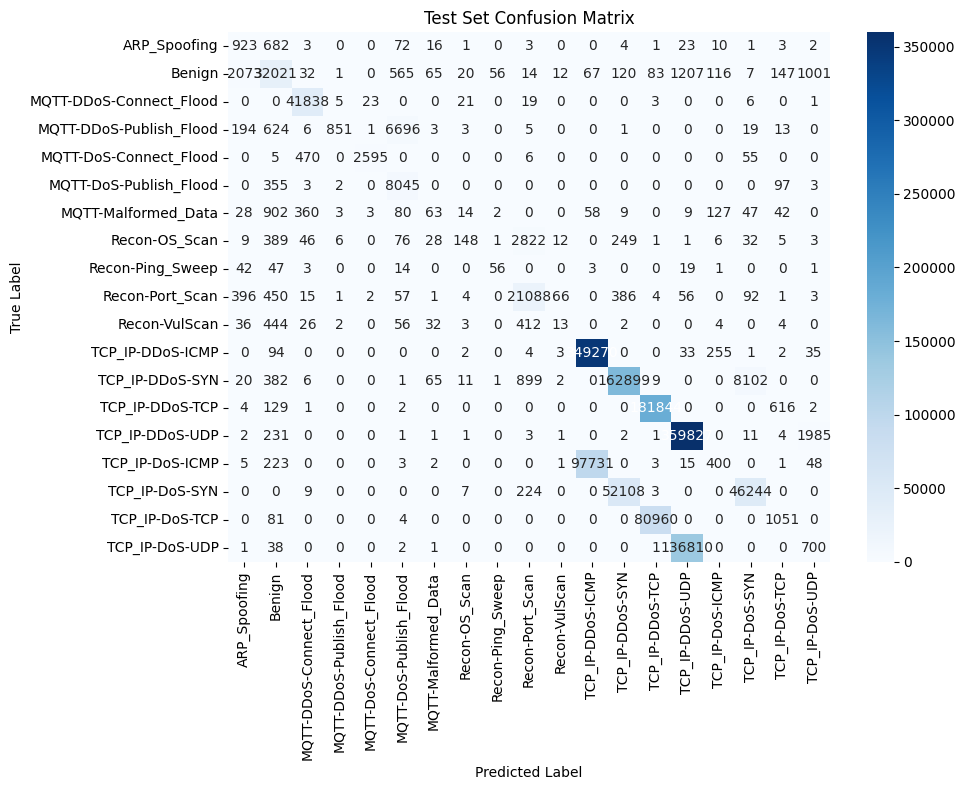

In [ ]:
evaluate_predictions(y_test_gpu, test_preds, y_test,
                    label_encoder, "Test Set")

### Deep Neural Network (DNN)

We will be using the standard Scaler to scale the inputs because DNN is sensitive to scaling factor.

In [ ]:
from tensorflow.keras.utils import to_categorical


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Encode labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode the labels
y_train_onehot = to_categorical(y_train_encoded)
y_val_onehot = to_categorical(y_val_encoded)
y_test_onehot = to_categorical(y_test_encoded)

In [ ]:
y_train_encoded

array([17, 12, 11, ..., 11,  1, 17])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:

# Compute class weights directly
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train_encoded),  # Unique class labels (e.g., 0 to 18)
    y=y_train_encoded  # 1D array of class indices
)

# Create the dictionary mapping class indices to weights
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Output class weights
print("Class Weights:", class_weight_dict)

Class Weights: {0: 23.48563885176409, 1: 1.9554864357266377, 2: 2.178074186615141, 3: 13.644159271379644, 4: 29.5075975317036, 5: 8.492961651191441, 6: 73.46701549194624, 7: 22.390363254043322, 8: 509.30512091038406, 9: 4.4877373160519065, 10: 173.48022530434255, 11: 0.24513275536691004, 12: 0.46995511251158856, 13: 0.46849246328141586, 14: 0.23037644770371102, 15: 0.9053416075252223, 16: 0.8528709149047227, 17: 0.9908041273416234, 18: 0.6647601895646604}


In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
# Define the model
# Define the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')        # Output layer
])

#### Train

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(
    X_train_scaled,
    y_train_onehot,
    validation_data=(X_val_scaled, y_val_onehot),
    epochs=5,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
89511/89511 ━━━━━━━━━━━━━━━━━━━━ 152s 2ms/step - accuracy: 0.5357 - loss: 1.1282 - val_accuracy: 0.5850 - val_loss: 0.6466
Epoch 2/5
89511/89511 ━━━━━━━━━━━━━━━━━━━━ 145s 2ms/step - accuracy: 0.5821 - loss: 0.6742 - val_accuracy: 0.4484 - val_loss: 0.6346
Epoch 3/5
89511/89511 ━━━━━━━━━━━━━━━━━━━━ 146s 2ms/step - accuracy: 0.5867 - loss: 0.6446 - val_accuracy: 0.5380 - val_loss: 0.6295
Epoch 4/5
89511/89511 ━━━━━━━━━━━━━━━━━━━━ 145s 2ms/step - accuracy: 0.5936 - loss: 0.6385 - val_accuracy: 0.4502 - val_loss: 0.6312
Epoch 5/5
89511/89511 ━━━━━━━━━━━━━━━━━━━━ 146s 2ms/step - accuracy: 0.5977 - loss: 0.6221 - val_accuracy: 0.7402 - val_loss: 0.6114


#### Validation


In [ ]:
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val_onehot)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

44756/44756 ━━━━━━━━━━━━━━━━━━━━ 53s 1ms/step - accuracy: 0.7401 - loss: 0.6118
Validation Loss: 0.611446738243103
Validation Accuracy: 0.7401546239852905


#### Test

In [ ]:
dnn_predictions = model.predict(X_test_scaled)

50444/50444 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step


In [ ]:
dnn_predictions

array([[1.93240568e-01, 6.12105057e-02, 2.94423342e-04, ...,
        2.08152045e-07, 4.53346547e-05, 1.71651933e-04],
       [3.16017494e-02, 9.79261845e-03, 1.27524952e-04, ...,
        3.71448511e-10, 2.02234855e-06, 1.04765331e-05],
       [2.83932071e-02, 6.32542837e-03, 8.71334578e-07, ...,
        2.48595370e-06, 1.61922765e-06, 1.55587859e-05],
       ...,
       [1.00200964e-07, 3.12128634e-08, 7.74728680e-16, ...,
        4.40273469e-12, 1.63290442e-13, 5.01077056e-01],
       [8.75541843e-08, 2.71219065e-08, 6.92907044e-16, ...,
        4.06191573e-12, 1.31887651e-13, 5.02428949e-01],
       [1.11849666e-07, 3.44334801e-08, 8.87992919e-16, ...,
        5.92963222e-12, 1.50374992e-13, 5.02556443e-01]], dtype=float32)

In [ ]:
dnn_predictions = np.argmax(dnn_predictions, axis=1)

In [ ]:
dnn_predictions

array([ 8,  8,  8, ..., 18, 18, 18])


Test Set Classification Report:
                         precision    recall  f1-score   support

           ARP_Spoofing       0.14      0.67      0.23      1744
                 Benign       0.98      0.76      0.86     37607
MQTT-DDoS-Connect_Flood       1.00      0.99      1.00     41916
MQTT-DDoS-Publish_Flood       0.99      0.12      0.22      8416
 MQTT-DoS-Connect_Flood       0.91      0.98      0.94      3131
 MQTT-DoS-Publish_Flood       0.53      1.00      0.69      8505
    MQTT-Malformed_Data       0.47      0.77      0.58      1747
          Recon-OS_Scan       0.54      0.13      0.20      3834
       Recon-Ping_Sweep       0.06      0.97      0.11       186
        Recon-Port_Scan       0.85      0.92      0.88     22622
          Recon-VulScan       0.21      0.36      0.26      1034
       TCP_IP-DDoS-ICMP       0.78      0.98      0.87    349699
        TCP_IP-DDoS-SYN       0.93      0.94      0.94    172397
        TCP_IP-DDoS-TCP       0.69      0.99      0.81  

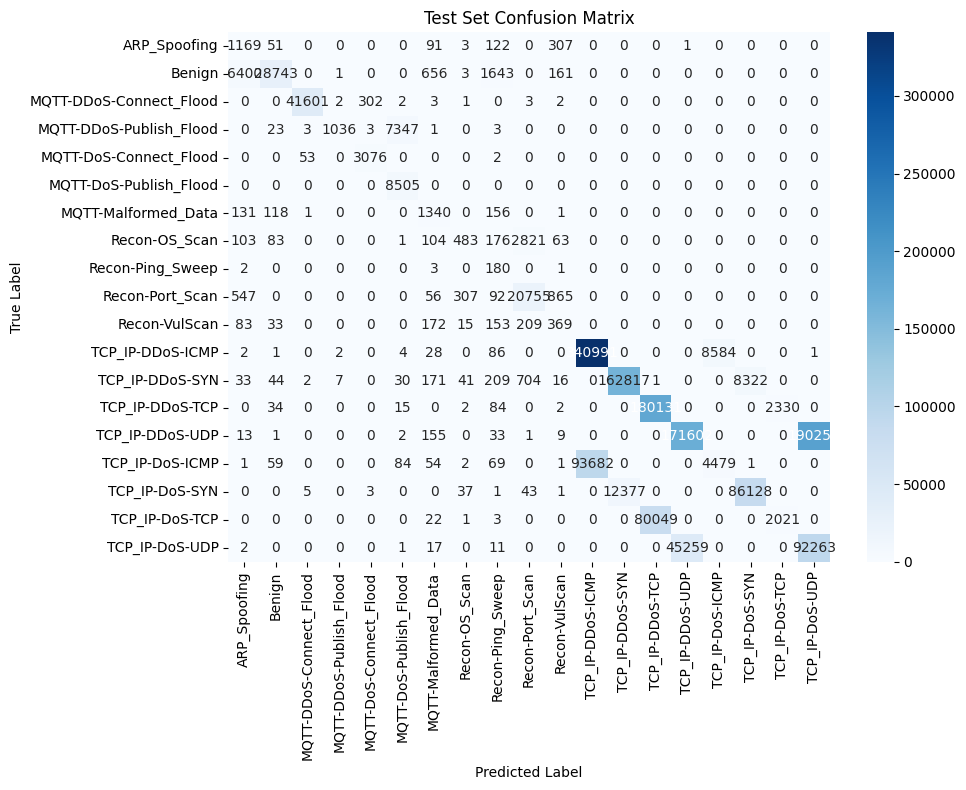

In [ ]:
evaluate_predictions(y_test_encoded, dnn_predictions, y_test,
                    label_encoder, "Test Set")

## Best Model for Each Category

Here’s a summary of the **best-performing models** for each classification category (Binary, Categorical, Multiclass), formatted for clarity and explanation, suitable for a Jupyter Notebook:

<br>

---

<br>

#### **1. Binary Classification**
| **Best Model**: **XGBoost**  
| **Metrics**:
- **Balanced Accuracy**: 0.9981

- **Precision**:  
  - Macro Avg: **0.93**  
  
- **Recall**:  
  - Macro Avg: **1.00**  

- **F1-Score**:  
  - Macro Avg: **0.96**  

<br>


**Importance of Scores in Context:**
- **Balanced Accuracy (0.9981)**: Ensures high performance across both "Benign" and "Attack" classes, critical to minimizing false negatives in detecting attacks.  
- **Recall (Macro Avg: 1.00)**: Highlights the model’s ability to identify all attack instances, ensuring no malicious activity is missed.  
- **Precision (Macro Avg: 0.93)**: Indicates some benign traffic may be misclassified as attacks, though the weighted precision (1.00) ensures negligible errors for the majority class.  
- **F1-Score (Macro Avg: 0.96)**: Balances precision and recall, reflecting the robustness of the model in correctly detecting attacks.

<br>

**Significance:**  
In security contexts, recall is paramount to ensure no attacks are missed. XGBoost achieves perfect recall, making it the best model for binary classification.

<br>
<br>


#### **2. Categorical Classification**

<br>


| **Best Model**: **XGBoost**  
| **Metrics**:
- **Balanced Accuracy**: 0.9518  
- **Precision**:  
  - Macro Avg: **0.89**  
  - Weighted Avg: **1.00**  
- **Recall**:  
  - Macro Avg: **0.95**  
  - Weighted Avg: **1.00**  
- **F1-Score**:  
  - Macro Avg: **0.91**  
  - Weighted Avg: **1.00**  

<br>

**Importance of Scores in Context:**
- **Balanced Accuracy (0.9518)**: Demonstrates the model's ability to handle all six categories (e.g., Benign, Spoofing, Recon, MQTT, DoS, DDoS) effectively, even with class imbalance.  
- **Recall (Macro Avg: 0.95)**: Highlights the strong ability to identify minority classes, such as Spoofing and Recon, crucial for early-stage attack detection.  
- **Precision (Macro Avg: 0.89)**: Indicates some misclassifications in minority classes, but the weighted precision (1.00) ensures dominant classes are perfectly predicted.  
- **F1-Score (Macro Avg: 0.91)**: Strikes a balance between precision and recall, making it effective in detecting both major and minor attacks.

<br>

**Significance:**  
Categorical classification is crucial for identifying specific types of attacks. XGBoost’s strong recall ensures detection across all categories, while its precision highlights minimal false alarms for critical traffic.



<br>


<br>


#### **3. Multiclass Classification**
| **Best Model**: **XGBoost**  
| **Metrics**:
- **Balanced Accuracy**: 0.99  
- **Precision**:  
  - Macro Avg: **0.83**  
  - Weighted Avg: **0.99**  
- **Recall**:  
  - Macro Avg: **0.89**  
  - Weighted Avg: **0.99**  
- **F1-Score**:  
  - Macro Avg: **0.82**  
  - Weighted Avg: **0.99**  


<br>

**Importance of Scores in Context:**
- **Balanced Accuracy (0.99)**: Reflects near-perfect performance across all 19 classes, including underrepresented attacks like Spoofing and Recon.  
- **Recall (Macro Avg: 0.89)**: Ensures the majority of instances, including minority classes, are correctly identified.  
- **Precision (Macro Avg: 0.83)**: Indicates some overlap in class predictions, particularly among closely related attack types (e.g., MQTT DoS vs. DDoS).  
- **F1-Score (Macro Avg: 0.82)**: Balances precision and recall, showing the model’s ability to generalize effectively across all classes.


<br>


**Significance:**  
Multiclass classification is the most challenging task due to the number of classes and similarities between some attack types. XGBoost’s high balanced accuracy and recall ensure robust detection of all attacks, making it the most reliable model for this task.






<br>

### **Why These Metrics Matter**
1. **Balanced Accuracy**: Critical for imbalanced datasets, ensuring fair evaluation across all classes, especially minority ones.  


2. **Precision**: Reduces false positives, minimizing unnecessary alarms.


3. **Recall**: Ensures high detection rates for all attack types, reducing the risk of missed threats.  


4. **F1-Score**: Balances precision and recall, reflecting the model’s robustness in real-world scenarios.



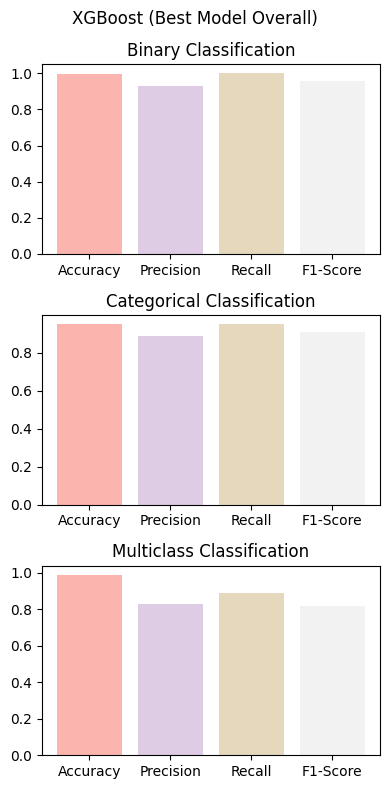

In [27]:
fields = ["Accuracy", "Precision", "Recall", "F1-Score"]

bin = [0.9981, 0.93, 1.00, 0.96]
cat = [0.9518, 0.89, 0.95, 0.91]
mul = [0.99, 0.83, 0.89, 0.82]

data = {
    "Binary": bin,
    "Categorical": cat,
    "Multiclass": mul
}

fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

colors = plt.cm.Pastel1(np.linspace(0, 1, 4))

ax1.bar(fields, bin, color=colors)
ax2.bar(fields, cat, color=colors)
ax3.bar(fields, mul, color=colors)


ax1.set_title("Binary Classification")
ax2.set_title("Categorical Classification")
ax3.set_title("Multiclass Classification")

fig.suptitle("XGBoost (Best Model Overall)")

plt.tight_layout()
plt.show()


## Appendix

#### Types of Attack


**DDoS vs DoS** - multiple distributed attacker vs 1 attacker.


**TCP_IP-DDoS-ICMP/ DoS:** The Internet Control Message Protocol (ICMP) is used to ensure that the packet is reaching it's intended target in a timely manner. In this attack, attackers' overwhelms the device (usually routers) to echo request the response.



**TCP_IP-DDoS/DoS-SYN:** The attacker sends SYN packet with spoofed IPs. Server responds with the SYN ack but never receives the ack from the client. Therefore leaving the connection half open.


**TCP_IP-DDoS/DoS-TCP:** The attacker floods the server with multiple TCP packets in large numbers.


**TCP_IP-DDoS/DoS-UDP:** The attacker sends multiple UDP packet and since there is no connection handshake required, so it's like fire and forget about the request while server processes each request as it was legit.


**ARP_Spoofing:** Also known as Man-in-the-middle attack. This happens when the attacker claims to be the server to the client and the client to the server.


**MQTT-DDoS/DoS-Connect_Flood:**  Message Queuing Telemetry Transport (MQTT) used as messaging protocol for IoT devices. This happens when an attacker repeatedly connect and disconnets from the broker's connection.

**MQTT-DDoS-Publish_Flood:** This is when the attacker floods the broker with multiple usually large published messages.

**MQTT-Malformed_Data:** When the attacker sends multiple invalid MQTT packets to the broker to test the error handling capabilities of the broker.

**Recon-OS_Scan:** Attack to gather OS information like version etc.

**Recon-Ping_Sweep:** This is used to discover whether the host is active basically it involves sending ICMP packets to different IP ranges.

**Recon-Port_Scan:** This is used to find any open services port available in the system.

**Recon-VulScan:** This is used to look for vulnerabilities in the system by using the existing dataset of the vulnerability patterns.

---

#### **How Data was collected**


The data collection for the CICIoMT2024 dataset involved a systematic approach to simulate and capture network traffic from various Internet of Medical Things (IoMT) devices under different attack scenarios. The following steps outline the methodology used in the data collection process:










**Establishment of the IoMT Testbed:**

A comprehensive IoMT testbed was created, consisting of 40 IoMT devices, which included 25 real devices and 15 simulated devices. The devices were selected to represent a variety of healthcare applications and protocols, including Wi-Fi, MQTT, and Bluetooth.
The testbed was designed to mimic realistic healthcare operations, allowing for the execution of various cyberattacks while capturing the resulting network traffic.

**Network Topology:**

The devices were organized into a network topology that facilitated the capture of traffic across different protocols. This topology included multiple access points, switches, and routers to ensure proper connectivity and isolation of traffic.
A network tap was employed to capture all traffic between the IoMT devices and the network without affecting the performance of the network.


**Execution of Cyberattacks:**

A total of 18 different cyberattacks were executed against the IoMT devices. These attacks were categorized into five classes: Distributed Denial of Service (DDoS), Denial of Service (DoS), Reconnaissance (Recon), MQTT-specific attacks, and Spoofing.
The attacks included various techniques such as ARP spoofing, ICMP floods, SYN floods, MQTT connect floods, and more. Each attack was carefully designed to assess the resilience of the IoMT devices and to generate relevant network traffic data.


**Traffic Capture:**

Network traffic was captured in real-time during the execution of the attacks. The captured data was stored in PCAP (Packet Capture) format, which is a standard format for network traffic data.
The traffic capture included both benign (normal operational) traffic and malicious traffic generated during the attack scenarios. This dual capture approach allowed for a comprehensive dataset that reflects both typical and anomalous behavior of IoMT devices.


**Data Processing and Feature Extraction:**

After the data was captured, it was processed to extract relevant features that could be used for machine learning evaluations. This involved converting the PCAP files into CSV format for easier analysis.
Various features were extracted from the network traffic, including packet lengths, protocol types, flag counts, and inter-arrival times. These features were essential for training machine learning models to detect and classify attacks.


**Profiling IoMT Device Lifecycle:**

In addition to capturing attack data, the lifecycle of each IoMT device was profiled. This profiling included monitoring the devices during different operational phases, such as power interaction, idle states, and active interactions.
The profiling data provided insights into the normal behavior of the devices, which is crucial for identifying anomalies during security assessments.




**Data Availability:**

The resulting dataset, CICIoMT2024, is made available for researchers and practitioners in the field of cybersecurity. It includes both the raw PCAP files and the processed CSV files, allowing for further analysis and development of security solutions for IoMT devices.

#### **References and Citations**





1.  **Research Paper**

     Sajjad Dadkhah, Euclides Carlos Pinto Neto, Raphael Ferreira, Reginald Chukwuka Molokwu, Somayeh Sadeghi, Ali A. Ghorbani, CICIoMT2024: A benchmark dataset for multi-protocol security assessment in IoMT, Internet of Things, Volume 28, 2024, 101351, https://doi.org/10.1016/j.iot.2024.101351.
 
<Br>

2. **Dataset Link**
  
    IoMT Dataset 2024 | Datasets | Research | Canadian Institute for Cybersecurity | UNB. (n.d.). https://www.unb.ca/cic/datasets/iomt-dataset-2024.html

<Br>

3. **Data Scaling**

    Hopson, M., & Hopson, M. (2023, December 1). Why Do We Scale Data In Machine Learning | Robots.net. Robots.net. https://robots.net/fintech/why-do-we-scale-data-in-machine-learning/
   
<Br>

5. **Feature Selection**

    Thailappan, D. (2024, September 25). Feature Selection Techniques in Machine Learning. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/06/feature-selection-techniques-in-machine-learning-2/

<Br>

5. **Random Forest Classifier**

  - Mehta, V. (2022, August 21). Accelerating Random Forests **Up to 45x** Using cuML | NVIDIA Technical Blog. NVIDIA Technical Blog. https://developer.nvidia.com/blog/accelerating-random-forests-up-to-45x-using-cuml/

  - Bradter, U., Altringham, J. D., Kunin, W. E., Thom, T. J., O’Connell, J., & Benton, T. G. (2022). Variable ranking and selection with random forest for unbalanced data. Environmental Data Science, 1. https://doi.org/10.1017/eds.2022.34
    
<Br>

6. **cuML (GPU Accelerated Algorithms)**

   Welcome to cuML’s documentation! — cuml 24.10.00 documentation. (n.d.). https://docs.rapids.ai/api/cuml/stable/

<Br>

7. **Logistic Regression**

   The 1-Neuron Network: Logistic Regression. (n.d.). The Data Frog. https://thedatafrog.com/en/articles/logistic-regression/

